In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pickle
import yaml
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
import pacc
import random
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams.update({'font.size': 22})
plt.rc('legend',fontsize=18)
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.10.0


In [65]:
PCA_bias_samples = np.array(pd.read_csv("./sompz_fake_chains/maximization/Y1_3x2_PCA_maximization/samples.csv"))
gp_bias_samples = np.array(pd.read_csv("./sompz_fake_chains/maximization/Y1_3x2_gp_maximization/samples.csv"))
dz_bias_samples = np.array(pd.read_csv("./sompz_fake_chains/maximization/Y1_3x2_dz_maximization/samples.csv"))
wzdz_bias_samples = np.array(pd.read_csv("./sompz_fake_chains/maximization/Y1_3x2_wzdz_maximization/samples.csv"))

print("dz bias: ", np.mean(dz_bias_samples, axis=0))
print("wzdz bias: ", np.mean(wzdz_bias_samples, axis=0))
print("PCA bias: ", np.mean(PCA_bias_samples, axis=0))
print("GP bias: ", np.mean(gp_bias_samples, axis=0))


dz bias:  [22.33042855  0.76642174  0.86785552  1.04618765  1.20695822  1.33394542
  1.58326622  0.97610567  0.42877858  0.26899359  0.78632716]
wzdz bias:  [70.67150925  0.73095238  0.88660191  1.0677178   1.22930146  1.35741604
  1.60138117  0.97792809  0.4152564   0.27901983  0.77392814]
PCA bias:  [54.61469747  0.73461405  0.87557969  1.05571807  1.21738461  1.34435069
  1.58545965  0.97797969  0.40692513  0.27369538  0.77969252]
GP bias:  [51.05869116  0.72495535  0.88286292  1.06388435  1.22605819  1.35256453
  1.59521248  0.98127203  0.40797978  0.27708124  0.7760294 ]


In [7]:
prat_markers = {'h': 0.7189925511925751,
               'Ωm': 0.2734714358876248,
               'Ωb': 0.042170616570847225,
               'ns': 0.9965136823002241,
               'σ8': 0.7790071910238021,
               'lens_0_b':0.879118,
               'lens_1_b':1.05894, 
               'lens_2_b':1.22145, 
               'lens_3_b':1.35065, 
               'lens_4_b':1.58909,
               'A_IA':0.25179439}

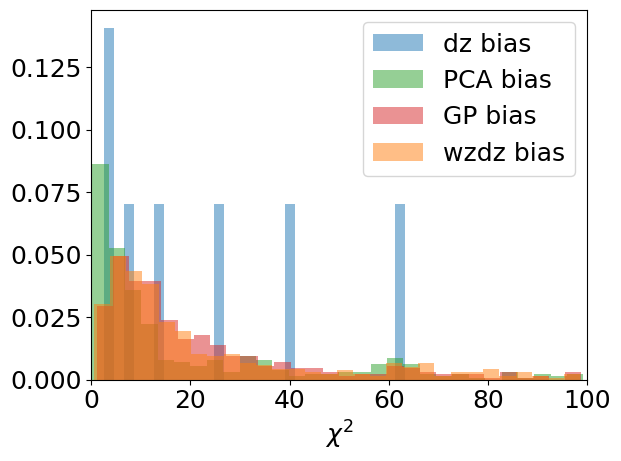

In [92]:
xi2_pca_bias = np.array(PCA_bias_samples[:, 0])
xi2_pca_bias = xi2_pca_bias[xi2_pca_bias < 100]
xi2_gp_bias = np.array(gp_bias_samples[:, 0])
xi2_gp_bias = xi2_gp_bias[xi2_gp_bias < 100]
xi2_dz_bias = np.array(dz_bias_samples[:, 0])
xi2_dz_bias = xi2_dz_bias[xi2_dz_bias < 100]
xi2_wzdz_bias = np.array(wzdz_bias_samples[:, 0])
xi2_wzdz_bias = xi2_wzdz_bias[xi2_wzdz_bias < 100]

plt.hist(xi2_dz_bias, bins=30, alpha=0.5, density=True, label='dz bias', color='C0')
plt.hist(xi2_pca_bias, bins=30, alpha=0.5, density=True, label='PCA bias', color='C2')
plt.hist(xi2_gp_bias, bins=30, alpha=0.5, density=True, label='GP bias', color='C3')
plt.hist(xi2_wzdz_bias, bins=30, alpha=0.5, density=True, label='wzdz bias', color='C1')
plt.legend()
plt.xlim(0, 100)
plt.xlabel(r"$\chi^2$")
plt.show()

dz bias Omega_m mean:  0.269  std:  0.0197
wzdz bias Omega_m mean:  0.279  std:  0.0295
PCA bias Omega_m mean:  0.2737  std:  0.0168
GP bias Omega_m mean:  0.2771  std:  0.0237
dz bias sigma8 mean:  0.7863  std:  0.0267
wzdz bias sigma8 mean:  0.7739  std:  0.0371
PCA bias sigma8 mean:  0.7797  std:  0.0233
GP bias sigma8 mean:  0.776  std:  0.0312


(0.7, 0.9)

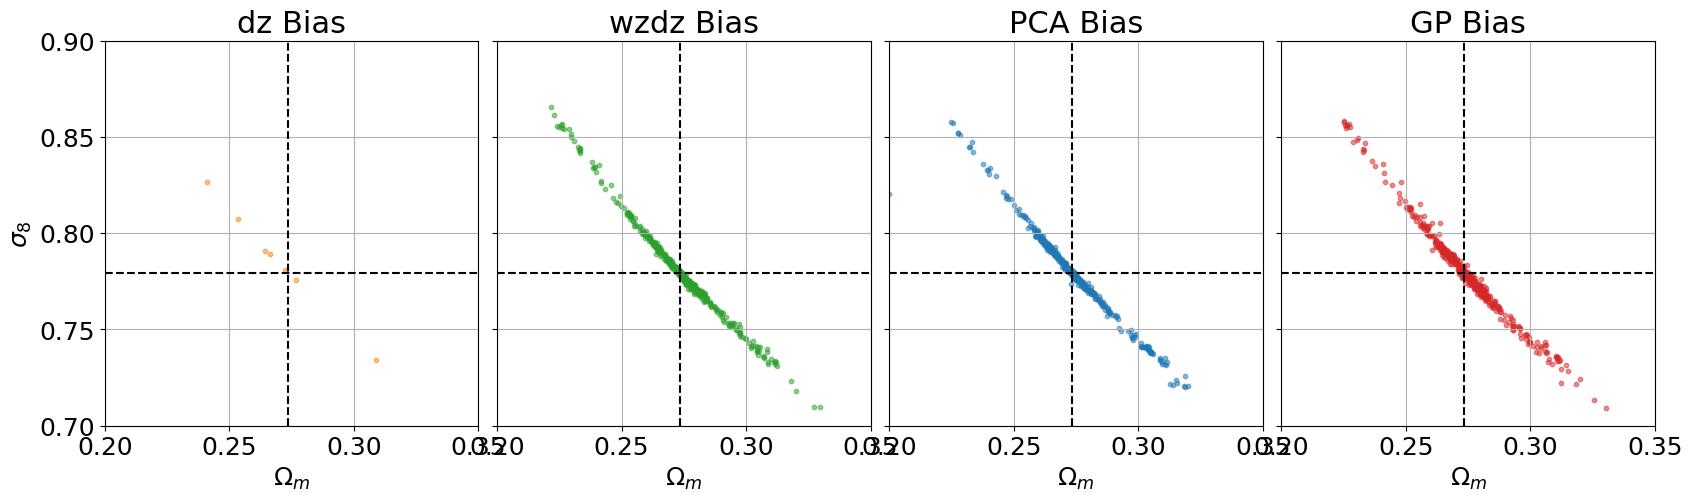

In [94]:
wm_pca_bias = np.array(PCA_bias_samples)[:,-2]
sigma8_pca_bias = np.array(PCA_bias_samples)[:,-1]

wm_dz_bias = np.array(dz_bias_samples)[:,-2]
sigma8_dz_bias = np.array(dz_bias_samples)[:,-1]

wm_wzdz_bias = np.array(wzdz_bias_samples)[:,-2]
sigma8_wzdz_bias = np.array(wzdz_bias_samples)[:,-1]

wm_gp_bias = np.array(gp_bias_samples)[:,-2]
sigma8_gp_bias = np.array(gp_bias_samples)[:,-1]

print("dz bias Omega_m mean: ", np.round(np.mean(wm_dz_bias), 4), " std: ", np.round(np.std(wm_dz_bias), 4))
print("wzdz bias Omega_m mean: ", np.round(np.mean(wm_wzdz_bias), 4), " std: ", np.round(np.std(wm_wzdz_bias), 4))
print("PCA bias Omega_m mean: ", np.round(np.mean(wm_pca_bias), 4), " std: ", np.round(np.std(wm_pca_bias), 4))
print("GP bias Omega_m mean: ", np.round(np.mean(wm_gp_bias), 4), " std: ", np.round(np.std(wm_gp_bias), 4))
print("======")
print("dz bias sigma8 mean: ", np.round(np.mean(sigma8_dz_bias), 4), " std: ", np.round(np.std(sigma8_dz_bias), 4))
print("wzdz bias sigma8 mean: ", np.round(np.mean(sigma8_wzdz_bias), 4), " std: ", np.round(np.std(sigma8_wzdz_bias), 4))
print("PCA bias sigma8 mean: ", np.round(np.mean(sigma8_pca_bias), 4), " std: ", np.round(np.std(sigma8_pca_bias), 4))
print("GP bias sigma8 mean: ", np.round(np.mean(sigma8_gp_bias), 4), " std: ", np.round(np.std(sigma8_gp_bias), 4))


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.05)

axes[0].scatter(wm_dz_bias, sigma8_dz_bias, label='dz bias', color='C1', alpha=0.5, s=10)
axes[0].set_xlabel(r"$\Omega_m$")
axes[0].set_ylabel(r"$\sigma_8$")
axes[0].set_title("dz Bias")
axes[0].grid()
axes[0].axvline(x=prat_markers['Ωm'], color='k', linestyle='--')
axes[0].axhline(y=prat_markers['σ8'], color='k', linestyle='--')
axes[0].set_xlim(0.2, 0.35)
axes[0].set_ylim(0.7, 0.9)

axes[1].scatter(wm_wzdz_bias, sigma8_wzdz_bias, label='wzdz bias', color='C2', alpha=0.5, s=10)
axes[1].set_xlabel(r"$\Omega_m$")
#axes[1].set_ylabel(r"$\sigma_8$")
axes[1].set_title("wzdz Bias")
axes[1].grid()
axes[1].axvline(x=prat_markers['Ωm'], color='k', linestyle='--')
axes[1].axhline(y=prat_markers['σ8'], color='k', linestyle='--')
axes[1].set_yticklabels([])
axes[1].set_xlim(0.2, 0.35)
axes[1].set_ylim(0.7, 0.9)

axes[2].scatter(wm_pca_bias, sigma8_pca_bias, label='PCA bias', color='C0', alpha=0.5, s=10)
axes[2].set_xlabel(r"$\Omega_m$")
#axes[2].set_ylabel(r"$\sigma_8$")
axes[2].set_title("PCA Bias")
axes[2].grid()
axes[2].axvline(x=prat_markers['Ωm'], color='k', linestyle='--')
axes[2].axhline(y=prat_markers['σ8'], color='k', linestyle='--')
axes[2].set_yticklabels([])
axes[2].set_xlim(0.2, 0.35)
axes[2].set_ylim(0.7, 0.9)

axes[3].scatter(wm_gp_bias, sigma8_gp_bias, label='GP bias', color='C3', alpha=0.5, s=10)
axes[3].set_xlabel(r"$\Omega_m$")
#axes[3].set_ylabel(r"$\sigma_8$")
axes[3].set_title("GP Bias")
axes[3].grid()
axes[3].axvline(x=prat_markers['Ωm'], color='k', linestyle='--')
axes[3].axhline(y=prat_markers['σ8'], color='k', linestyle='--')
axes[3].set_yticklabels([])
axes[3].set_xlim(0.2, 0.35)
axes[3].set_ylim(0.7, 0.9)  

dz bias S8 mean:  0.7432  std:  0.0013
wzdz bias S8 mean:  0.7436  std:  0.0026
PCA bias S8 mean:  0.7437  std:  0.0039
GP bias S8 mean:  0.7439  std:  0.0024
dz bias bias4 mean:  1.5833  std:  0.0599
wzdz bias bias4 mean:  1.6014  std:  0.0944
PCA bias bias4 mean:  1.5855  std:  0.0542
GP bias bias4 mean:  1.5952  std:  0.0762


(0.73, 0.76)

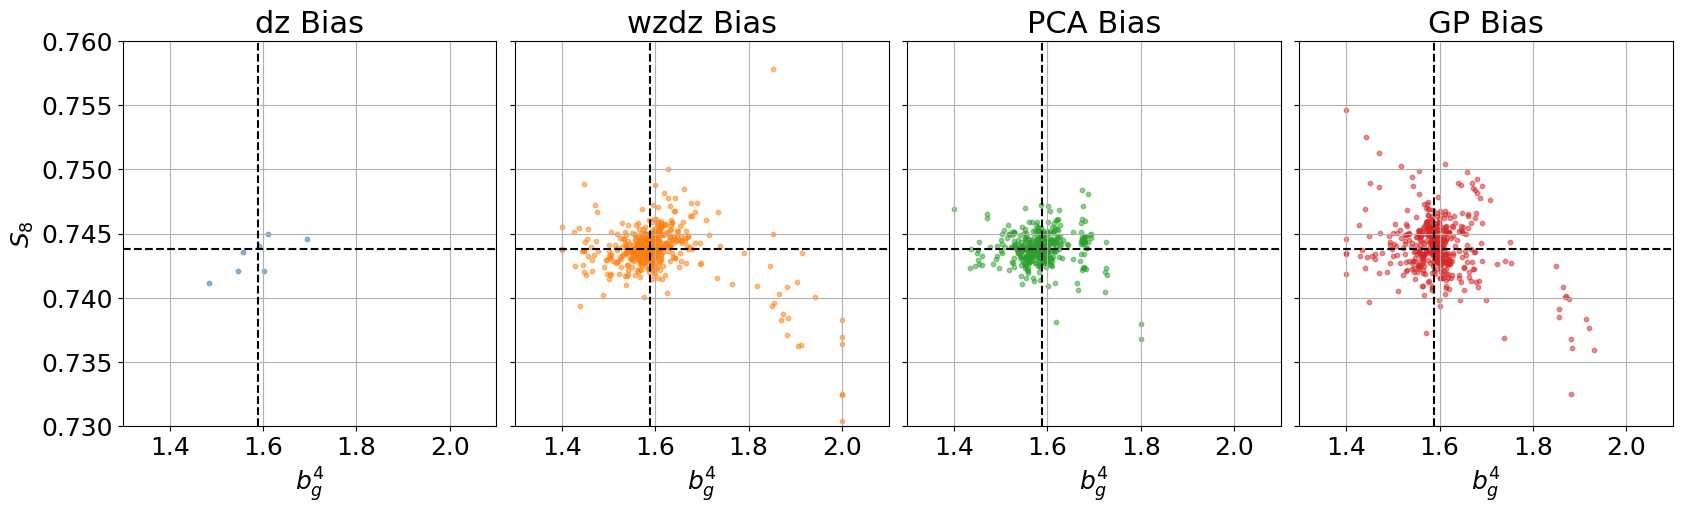

In [85]:
S8_dz_bias = sigma8_dz_bias * (wm_dz_bias / 0.3)**0.5
S8_wzdz_bias = sigma8_wzdz_bias * (wm_wzdz_bias / 0.3)**0.5
S8_gp_bias = sigma8_gp_bias * (wm_gp_bias / 0.3)**0.5
S8_pca_bias = sigma8_pca_bias * (wm_pca_bias / 0.3)**0.5

bias4_dz_bias = np.array(dz_bias_samples)[:,6]
bias4_wzdz_bias = np.array(wzdz_bias_samples)[:,6]
bias4_pca_bias = np.array(PCA_bias_samples)[:,6]
bias4_gp_bias = np.array(gp_bias_samples)[:,6]

print("dz bias S8 mean: ", np.round(np.mean(S8_dz_bias), 4), " std: ", np.round(np.std(S8_dz_bias), 4))
print("wzdz bias S8 mean: ", np.round(np.mean(S8_wzdz_bias), 4), " std: ", np.round(np.std(S8_wzdz_bias), 4))
print("PCA bias S8 mean: ", np.round(np.mean(S8_pca_bias), 4), " std: ", np.round(np.std(S8_pca_bias), 4))
print("GP bias S8 mean: ", np.round(np.mean(S8_gp_bias), 4), " std: ", np.round(np.std(S8_gp_bias), 4))
print("======")
print("dz bias bias4 mean: ", np.round(np.mean(bias4_dz_bias), 4), " std: ", np.round(np.std(bias4_dz_bias), 4))
print("wzdz bias bias4 mean: ", np.round(np.mean(bias4_wzdz_bias), 4), " std: ", np.round(np.std(bias4_wzdz_bias), 4))
print("PCA bias bias4 mean: ", np.round(np.mean(bias4_pca_bias), 4), " std: ", np.round(np.std(bias4_pca_bias), 4))
print("GP bias bias4 mean: ", np.round(np.mean(bias4_gp_bias), 4), " std: ", np.round(np.std(bias4_gp_bias), 4))

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.05)
axes[0].scatter(bias4_dz_bias, S8_dz_bias, label='dz bias', color='C0', alpha=0.5, s=10)
axes[0].set_xlabel(r"$b_g^4$")
axes[0].set_ylabel(r"$S_8$")
axes[0].set_title("dz Bias")
axes[0].grid()
axes[0].axvline(x=prat_markers['lens_4_b'], color='k', linestyle='--')
axes[0].axhline(y=prat_markers['σ8'] * (prat_markers['Ωm'] / 0.3)**0.5, color='k', linestyle='--')
axes[0].set_xlim(1.3, 2.1)
axes[0].set_ylim(0.73, 0.76)

axes[1].scatter(bias4_wzdz_bias, S8_wzdz_bias, label='wzdz bias', color='C1', alpha=0.5, s=10)
axes[1].set_xlabel(r"$b_g^4$")
#axes[1].set_ylabel(r"$\sigma_8$")
axes[1].set_title("wzdz Bias")
axes[1].grid()
axes[1].axvline(x=prat_markers['lens_4_b'], color='k', linestyle='--')
axes[1].axhline(y=prat_markers['σ8'] * (prat_markers['Ωm'] / 0.3)**0.5, color='k', linestyle='--')
axes[1].set_yticklabels([])  # Hide y-axis labels for middle plots
axes[1].set_xlim(1.3, 2.1)
axes[1].set_ylim(0.73, 0.76)

axes[2].scatter(bias4_pca_bias, S8_pca_bias, label='PCA bias', color='C2', alpha=0.5, s=10)
axes[2].set_xlabel(r"$b_g^4$")
#axes[2].set_ylabel(r"$\sigma_8$")
axes[2].set_title("PCA Bias")
axes[2].grid()
axes[2].axvline(x=prat_markers['lens_4_b'], color='k', linestyle='--')
axes[2].axhline(y=prat_markers['σ8'] * (prat_markers['Ωm'] / 0.3)**0.5, color='k', linestyle='--')
axes[2].set_yticklabels([])  # Hide y-axis labels for middle plots
axes[2].set_xlim(1.3, 2.1)
axes[2].set_ylim(0.73, 0.76)

axes[3].scatter(bias4_gp_bias, S8_gp_bias, label='GP bias', color='C3', alpha=0.5, s=10)
axes[3].set_xlabel(r"$b_g^4$")
#axes[3].set_ylabel(r"$\sigma_8$")
axes[3].set_title("GP Bias")
axes[3].grid()
axes[3].axvline(x=prat_markers['lens_4_b'], color='k', linestyle='--')
axes[3].axhline(y=prat_markers['σ8'] * (prat_markers['Ωm'] / 0.3)**0.5, color='k', linestyle='--')
axes[3].set_yticklabels([])  # Hide y-axis labels for middle plots
axes[3].set_xlim(1.3, 2.1)
axes[3].set_ylim(0.73, 0.76)

(0.7, 1.1)

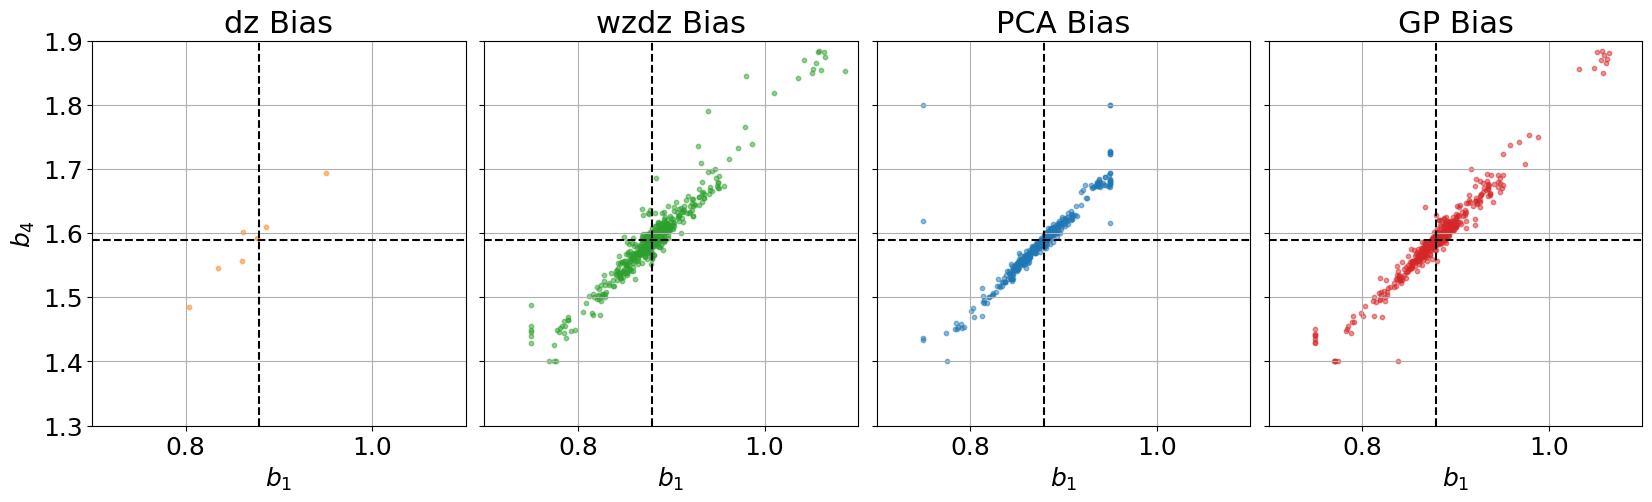

In [99]:
bias1_pca_bias = np.array(PCA_bias_samples)[:,2]
bias4_pca_bias = np.array(PCA_bias_samples)[:,6]

bias1_dz_bias = np.array(dz_bias_samples)[:,2]
bias4_dz_bias = np.array(dz_bias_samples)[:,6]

bias1_wzdz_bias = np.array(wzdz_bias_samples)[:,2]
bias4_wzdz_bias = np.array(wzdz_bias_samples)[:,6]

bias1_gp_bias = np.array(gp_bias_samples)[:,2]
bias4_gp_bias = np.array(gp_bias_samples)[:,6]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.05)

axes[0].scatter(bias1_dz_bias, bias4_dz_bias, label='dz bias', color='C1', alpha=0.5, s=10)
axes[0].set_xlabel(r"$b_1$")
axes[0].set_ylabel(r"$b_4$")
axes[0].set_title("dz Bias")
axes[0].grid()
axes[0].axvline(x=prat_markers['lens_0_b'], color='k', linestyle='--')
axes[0].axhline(y=prat_markers['lens_4_b'], color='k', linestyle='--')
axes[0].set_xlim(0.7, 1.1)
axes[0].set_ylim(1.3, 1.9)

axes[1].scatter(bias1_wzdz_bias, bias4_wzdz_bias, label='wzdz bias', color='C2', alpha=0.5, s=10)
axes[1].set_xlabel(r"$b_1$")
#axes[1].set_ylabel(r"$\sigma_8$")
axes[1].set_title("wzdz Bias")
axes[1].grid()
axes[1].axvline(x=prat_markers['lens_0_b'], color='k', linestyle='--')
axes[1].axhline(y=prat_markers['lens_4_b'], color='k', linestyle='--')
axes[1].set_yticklabels([]) 
axes[1].set_xlim(0.7, 1.1)
axes[1].set_ylim(1.3, 1.9)

axes[2].scatter(bias1_pca_bias, bias4_pca_bias, label='PCA bias', color='C0', alpha=0.5, s=10)
axes[2].set_xlabel(r"$b_1$")
#axes[2].set_ylabel(r"$\sigma_8$")
axes[2].set_title("PCA Bias")
axes[2].grid()
axes[2].axvline(x=prat_markers['lens_0_b'], color='k', linestyle='--')
axes[2].axhline(y=prat_markers['lens_4_b'], color='k', linestyle='--')
axes[2].set_yticklabels([]) 
axes[2].set_xlim(0.7, 1.1)
axes[2].set_ylim(1.3, 1.9)

axes[3].scatter(bias1_gp_bias, bias4_gp_bias, label='GP bias', color='C3', alpha=0.5, s=10)
axes[3].set_xlabel(r"$b_1$")
#axes[3].set_ylabel(r"$\sigma_8$")
axes[3].set_title("GP Bias")
axes[3].grid()
axes[3].axvline(x=prat_markers['lens_0_b'], color='k', linestyle='--')
axes[3].axhline(y=prat_markers['lens_4_b'], color='k', linestyle='--')
axes[3].set_yticklabels([]) 
axes[3].set_ylim(1.3, 1.9)
axes[3].set_xlim(0.7, 1.1)

## Load Data

In [12]:
s_3x2 = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_3x2 = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc_gcwl_wlwl.yml"), Loader=yaml.FullLoader)

Assuming data rows are in the correct order as it was before version 1.0.


In [13]:
cle_3x2  = pacc.ClsEnsemble(s_3x2, y_3x2,   label="CosmoDC2 3x2  - data")

In [14]:
data = np.load("/home/jaimerzp/Documents/UCL/3x2_analytical/bpz_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03/data_1.npz")
cle_3x2_fake = pacc.ClTheoryEnsemble(cle_3x2, data["data"], label="CosmoDC2 3x2 - Synthetic data")

In [15]:
tpts = np.load("covs/COSMODC2/bpz_3x2_tpts_covs.npz")
cov = np.diag(tpts["cov"])
tt_dz   = np.diag(tpts["TT_dz"])   - cov
tt_wzdz = np.diag(tpts["TT_wzdz"]) - cov
tt_pca  = np.diag(tpts["TT_pca"])  - cov
tt_gp   = np.diag(tpts["TT_gp"])   - cov
total_l = 0
_tt_dz = []
_tt_wzdz = []
_tt_pca = []
_tt_gp = []
_cov = []
for d in cle_3x2.data:
    dz = tt_dz[total_l:total_l+len(d)]
    wzdz = tt_wzdz[total_l:total_l+len(d)]
    pca = tt_pca[total_l:total_l+len(d)]
    gp = tt_gp[total_l:total_l+len(d)]
    c = cov[total_l:total_l+len(d)]
    _tt_dz.append(dz/c)
    _tt_wzdz.append(wzdz/c)
    _tt_pca.append(pca/c)
    _tt_gp.append(gp/c)
    _cov.append(c)
    total_l += len(d)

cle_3x2_tt_dz = pacc.ClsEnsemble(s_3x2, y_3x2,   label=r"$\delta z$")
cle_3x2_tt_dz.errs = _tt_dz
cle_3x2_tt_wzdz = pacc.ClsEnsemble(s_3x2, y_3x2,   label=r"$w_z \, \delta z$")
cle_3x2_tt_wzdz.errs = _tt_wzdz
cle_3x2_tt_pca = pacc.ClsEnsemble(s_3x2, y_3x2,   label="PCA")
cle_3x2_tt_pca.errs = _tt_pca
cle_3x2_tt_gp = pacc.ClsEnsemble(s_3x2, y_3x2,   label="GP")
cle_3x2_tt_gp.errs = _tt_gp

In [16]:
labels = [
    r'$\left(\frac{\partial t^{\rm lens \, 1} \partial t^{\rm lens \, 1}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 2} \partial t^{\rm lens \, 2}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 3} \partial t^{\rm lens \, 3}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 4} \partial t^{\rm lens \, 4}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm lens \, 5} \partial t^{\rm lens \, 5}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 1} \partial t^{\rm source \, 1}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 2} \partial t^{\rm source \, 2}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 3} \partial t^{\rm source \, 3}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 4} \partial t^{\rm source \, 4}}{\partial_\theta^2}\right)/ \mathbb{C}$',
    r'$\left(\frac{\partial t^{\rm source \, 5} \partial t^{\rm source \, 5}}{\partial_\theta^2}\right)/ \mathbb{C}$',
]

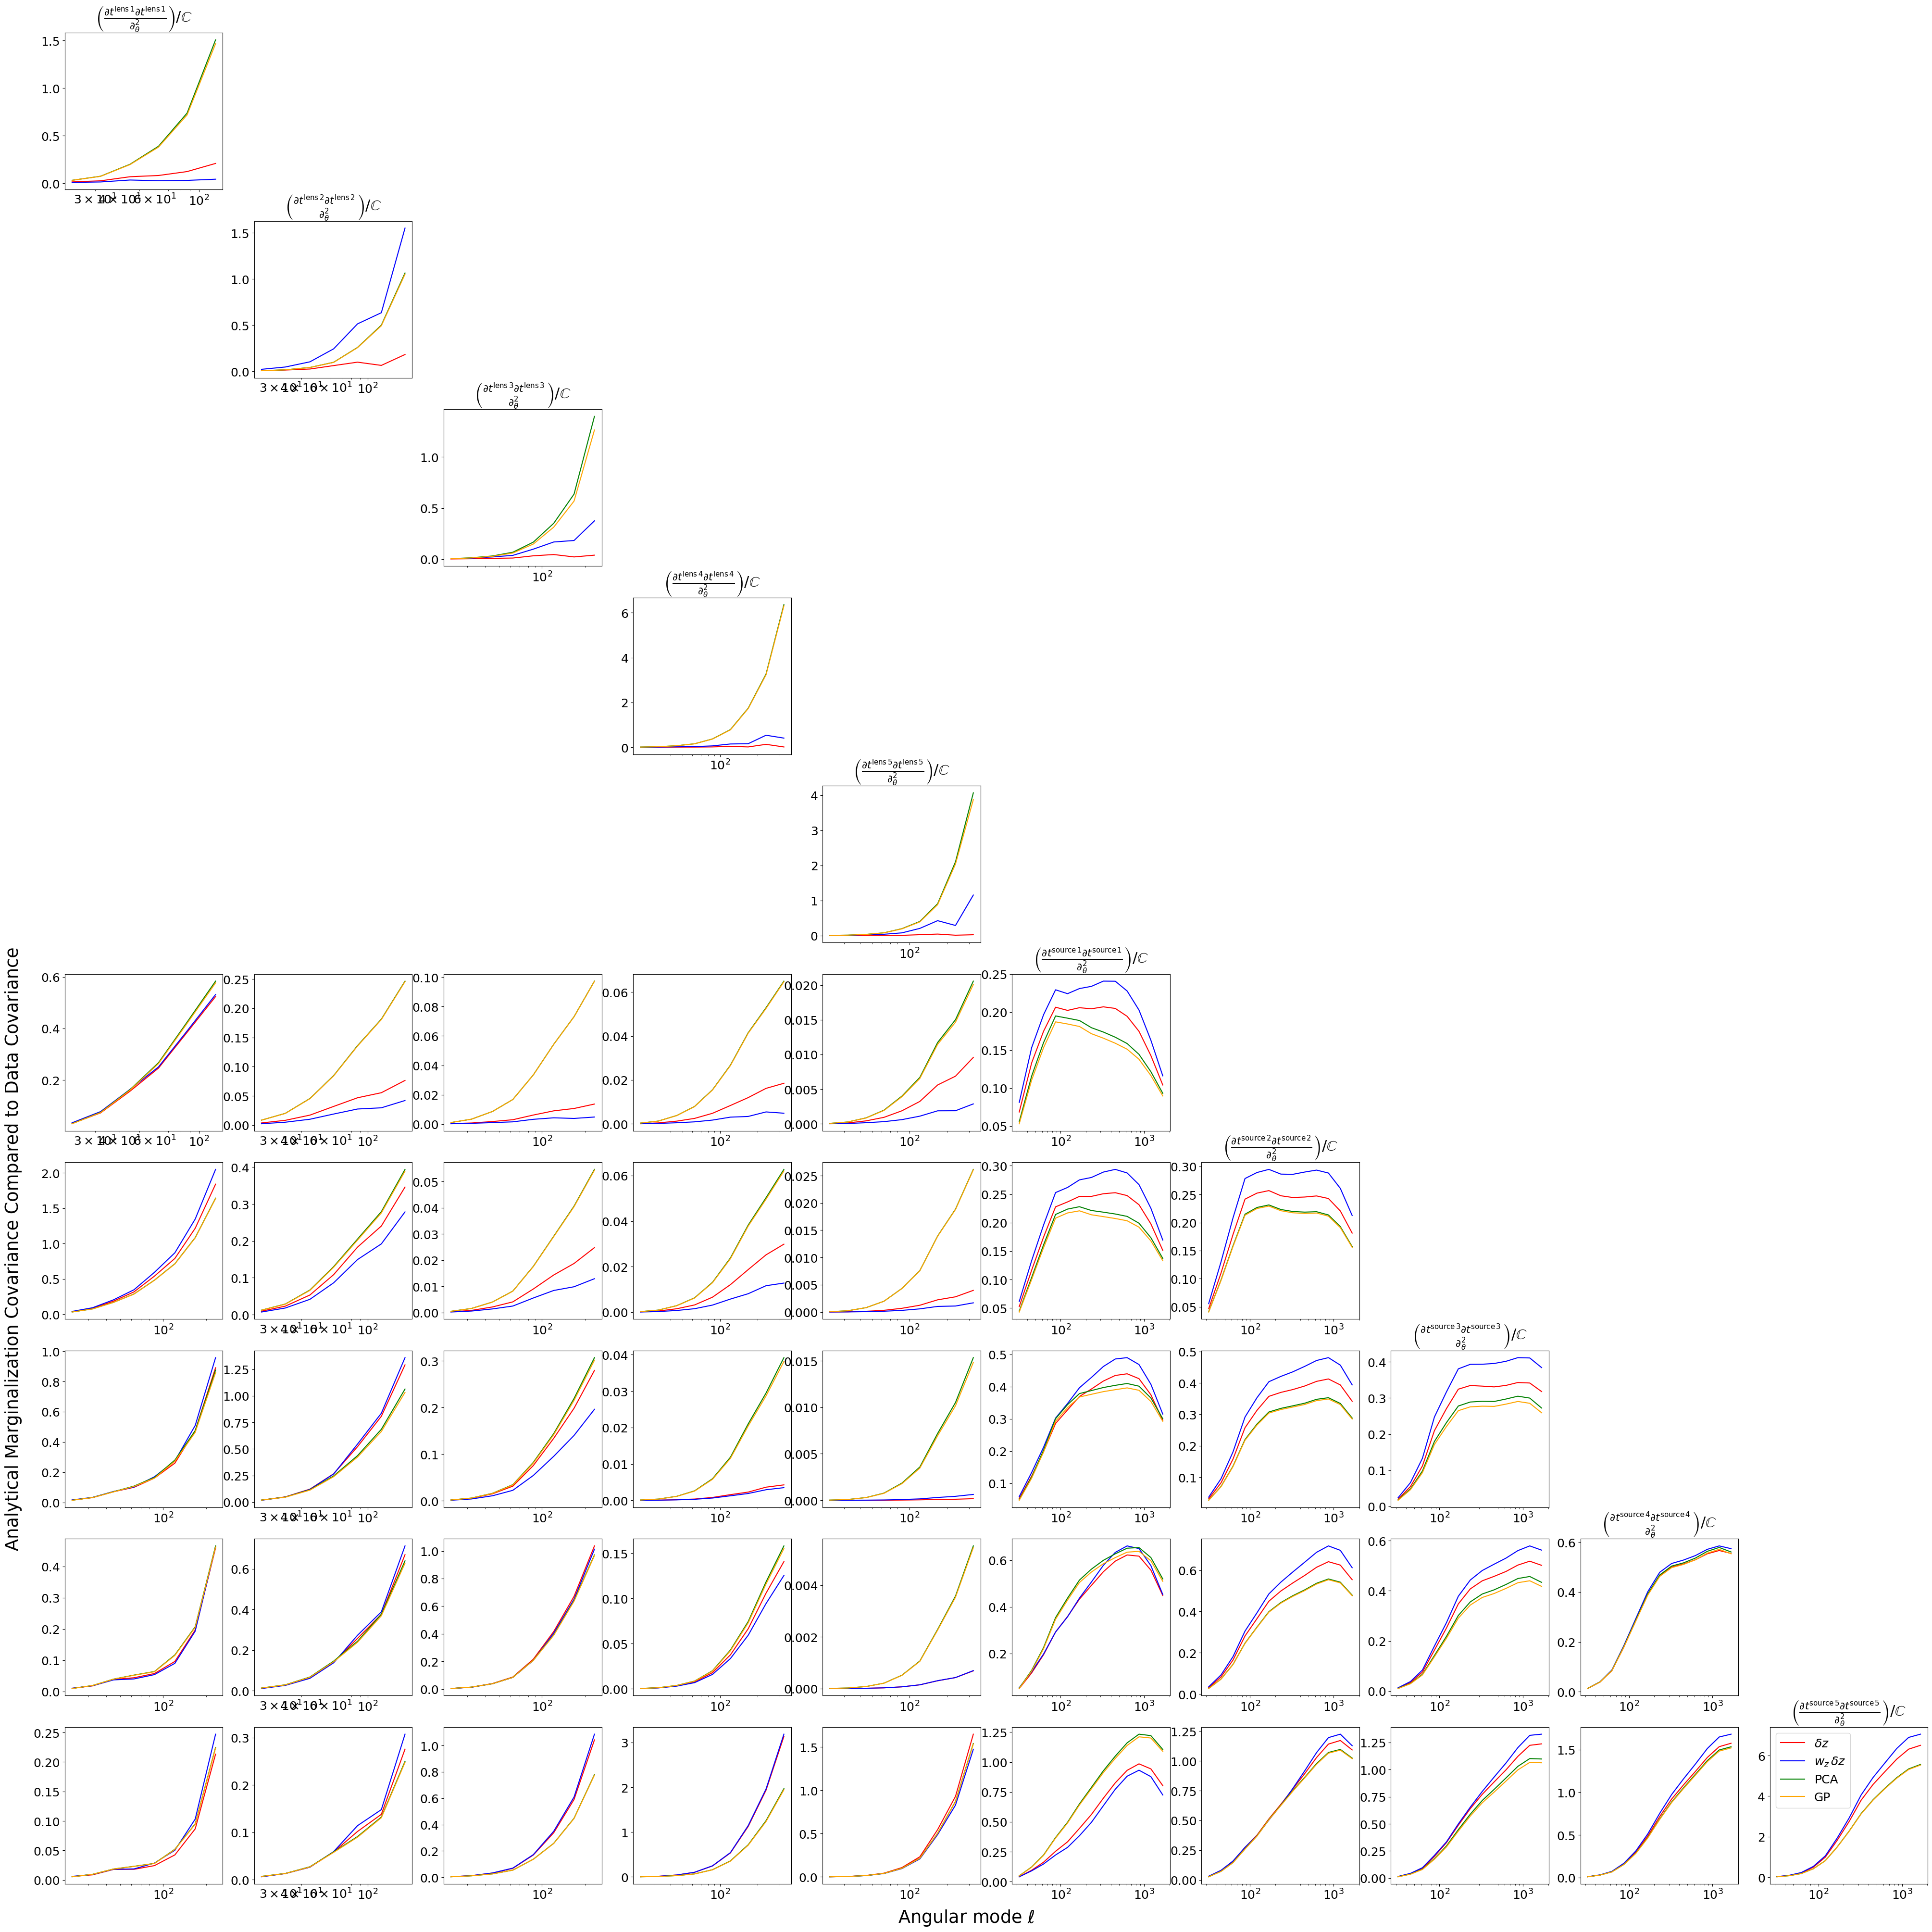

In [17]:
colors = ['r', 'b', 'g', 'orange']
g = pacc.plot_errs([[cle_3x2_tt_dz, cle_3x2_tt_wzdz, cle_3x2_tt_pca, cle_3x2_tt_gp]], cle_3x2.pairs,
               configs=[{'colors': colors},
                        {'colors': colors}, 
                        {'colors': colors}, 
                        {'colors': colors}],
                labels=labels);
g.savefig("./paper_plots/tpts_3x2.pdf", bbox_inches='tight')

In [18]:
labels = [
    r'$C_\ell^{\rm lens 1 \, lens 1}$',
    r'$C_\ell^{\rm lens 2 \, lens 2}$',
    r'$C_\ell^{\rm lens 3 \, lens 3}$',
    r'$C_\ell^{\rm lens 4 \, lens 4}$',
    r'$C_\ell^{\rm lens 5 \, lens 5}$',
    r'$C_\ell^{\rm source 1 \, source 1}$',
    r'$C_\ell^{\rm source 2 \, source 2}$',
    r'$C_\ell^{\rm source 3 \, source 3}$',
    r'$C_\ell^{\rm source 4 \, source 4}$',
    r'$C_\ell^{\rm source 5 \, source 5}$',
]

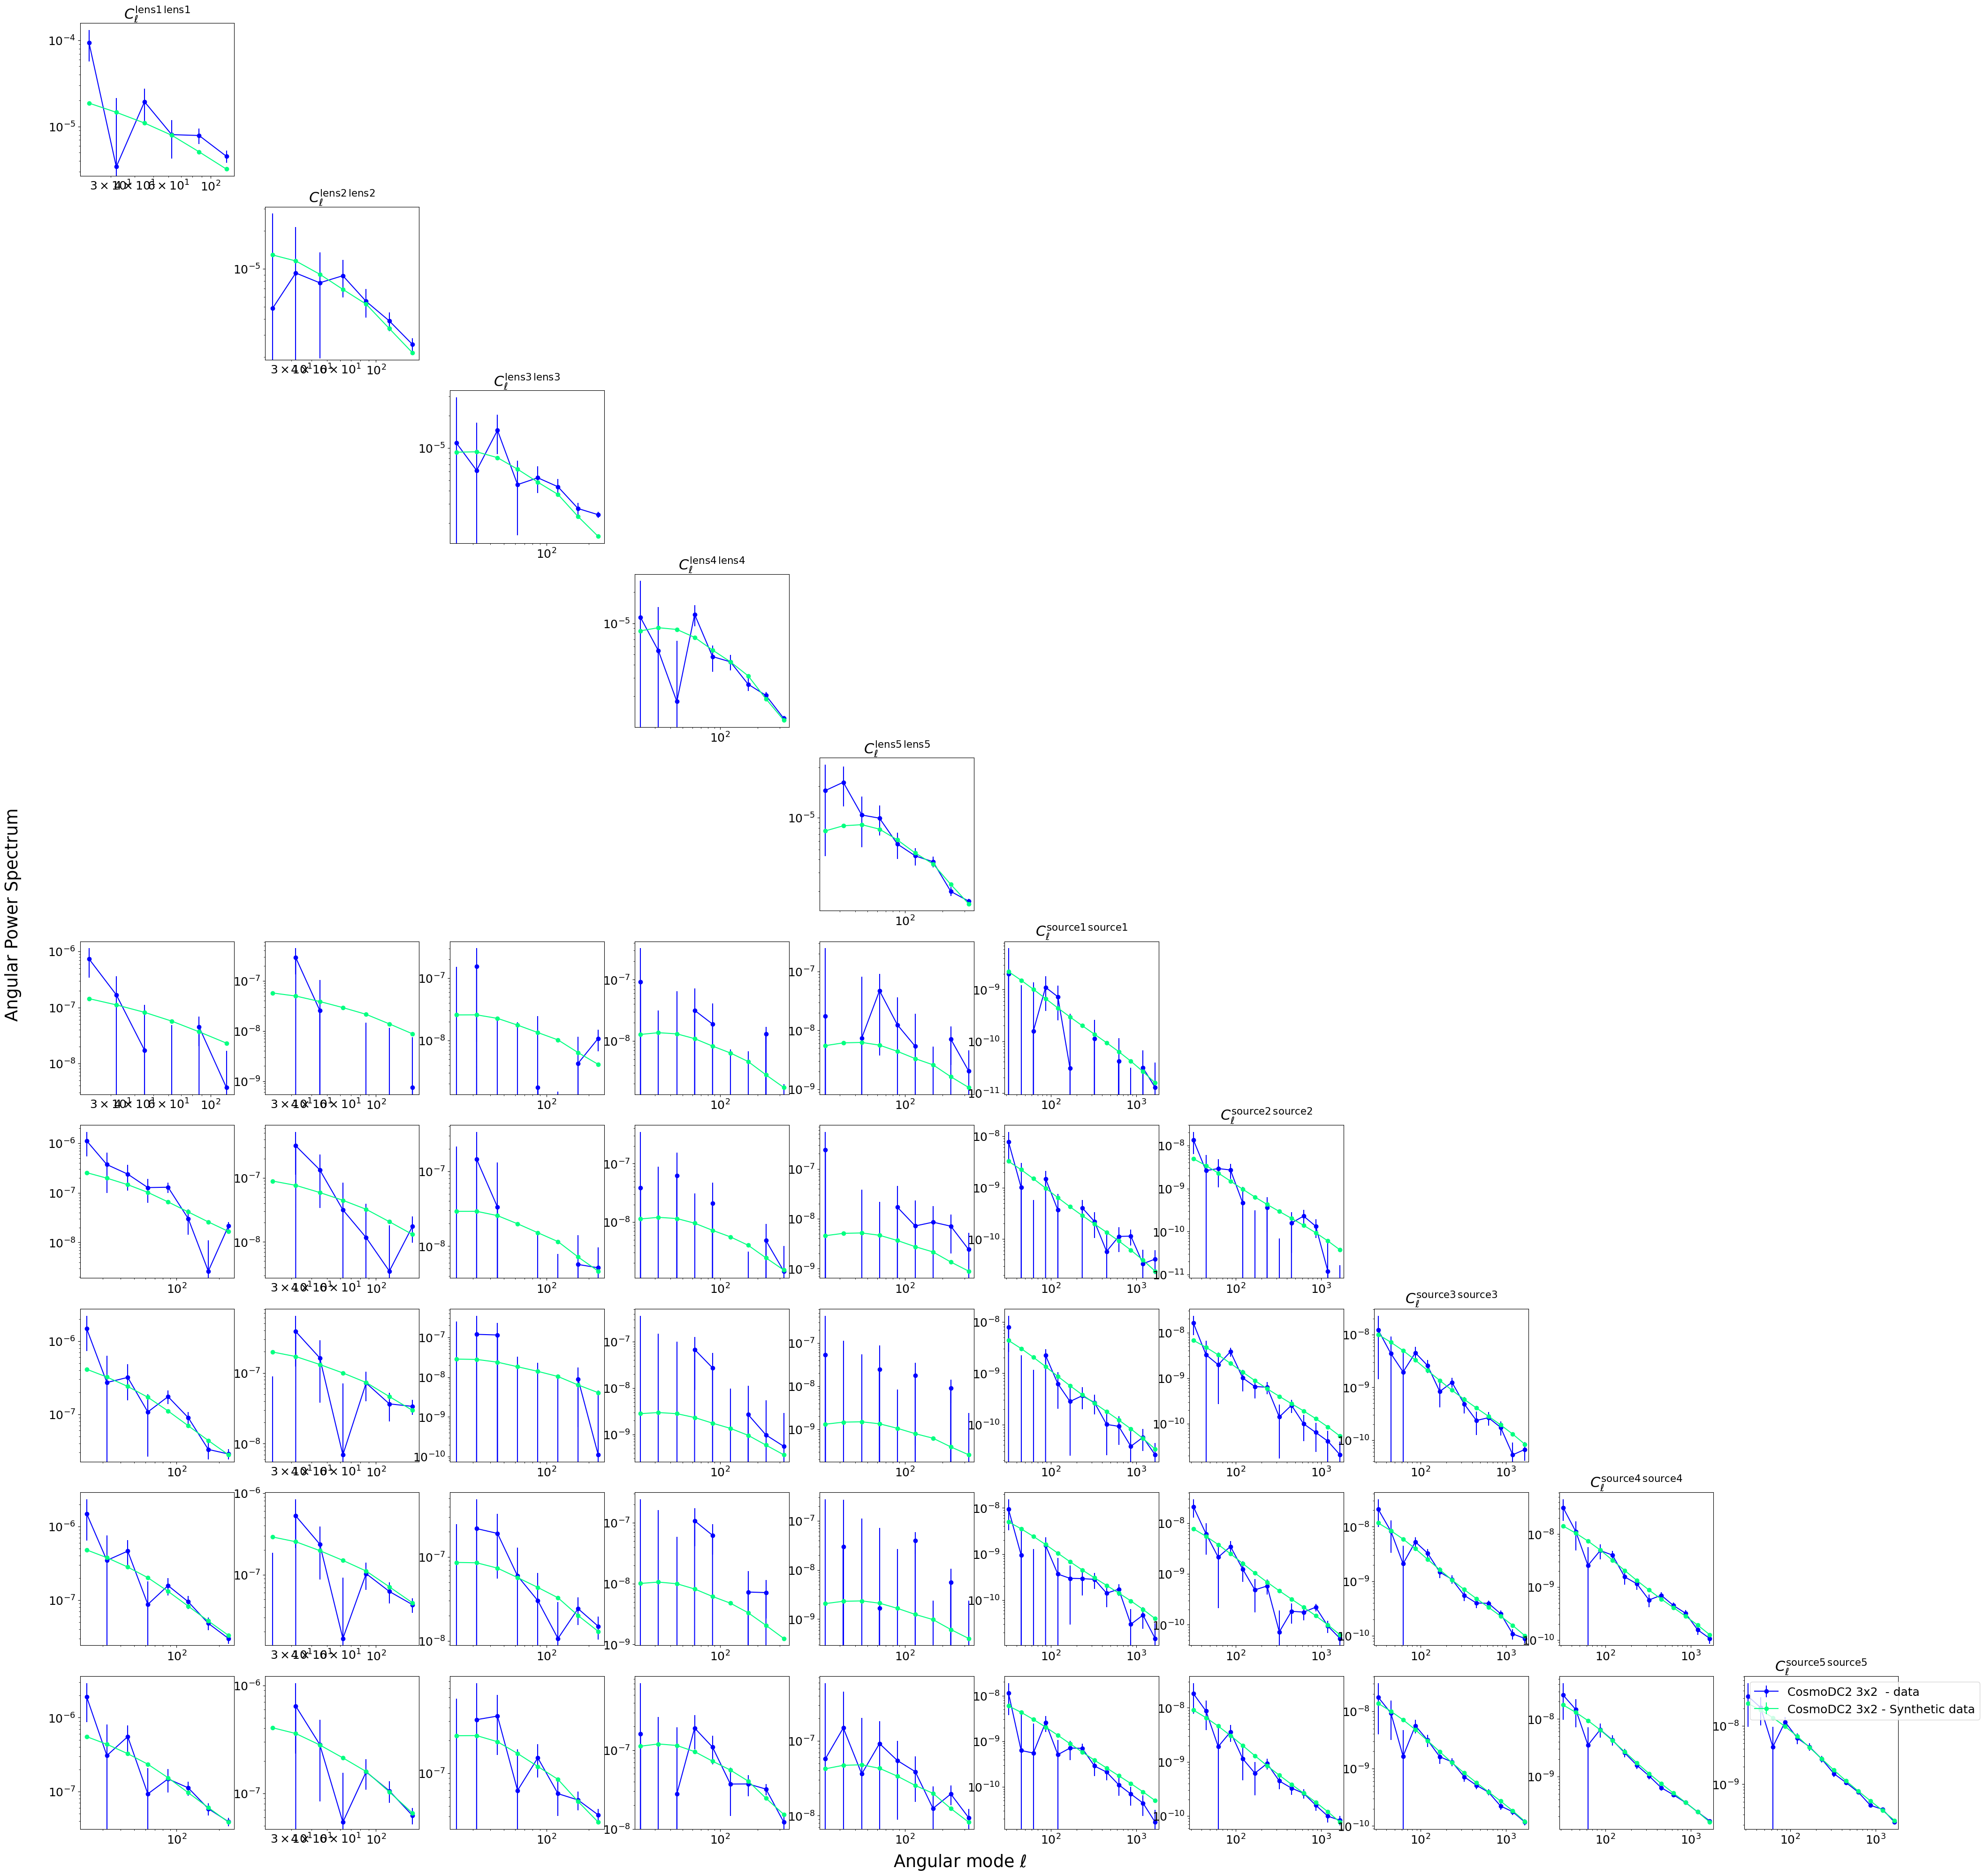

In [19]:
g = pacc.plot_cls([[cle_3x2, cle_3x2_fake]], cle_3x2.pairs, labels=labels);
g.savefig("./paper_plots/data_3x2.pdf", bbox_inches='tight')

In [20]:
from numpy.random import multivariate_normal as mvn
wzdz_path = "./data/CosmoDC2/nzs_sompz/wzdz_priors/"
nz_lens_0 = np.load(wzdz_path + "wzdz_lens_0.npz")
nz_lens_1 = np.load(wzdz_path + "wzdz_lens_1.npz")
nz_lens_2 = np.load(wzdz_path + "wzdz_lens_2.npz")
nz_lens_3 = np.load(wzdz_path + "wzdz_lens_3.npz")
nz_lens_4 = np.load(wzdz_path + "wzdz_lens_4.npz")
nz_source_0 = np.load(wzdz_path + "wzdz_source_0.npz")
nz_source_1 = np.load(wzdz_path + "wzdz_source_1.npz")
nz_source_2 = np.load(wzdz_path + "wzdz_source_2.npz")
nz_source_3 = np.load(wzdz_path + "wzdz_source_3.npz")
nz_source_4 = np.load(wzdz_path + "wzdz_source_4.npz")

thetas_lens_0 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_0["cov"]) for _ in range(10000)]).T
thetas_lens_1 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_1["cov"]) for _ in range(10000)]).T
thetas_lens_2 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_2["cov"]) for _ in range(10000)]).T
thetas_lens_3 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_3["cov"]) for _ in range(10000)]).T
thetas_lens_4 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_lens_4["cov"]) for _ in range(10000)]).T
thetas_source_0 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_0["cov"]) for _ in range(10000)]).T
thetas_source_1 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_1["cov"]) for _ in range(10000)]).T
thetas_source_2 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_2["cov"]) for _ in range(10000)]).T
thetas_source_3 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_3["cov"]) for _ in range(10000)]).T
thetas_source_4 = np.array([np.array([0, 1]) + mvn(np.zeros(2), nz_source_4["cov"]) for _ in range(10000)]).T

prior_wzdz_chain = {}
prior_wzdz_chain["dz_lens_0"] = thetas_lens_0[0]
prior_wzdz_chain["wz_lens_0"] = thetas_lens_0[1]
prior_wzdz_chain["dz_lens_1"] = thetas_lens_1[0]
prior_wzdz_chain["wz_lens_1"] = thetas_lens_1[1]
prior_wzdz_chain["dz_lens_2"] = thetas_lens_2[0]
prior_wzdz_chain["wz_lens_2"] = thetas_lens_2[1]
prior_wzdz_chain["dz_lens_3"] = thetas_lens_3[0]
prior_wzdz_chain["wz_lens_3"] = thetas_lens_3[1]
prior_wzdz_chain["dz_lens_4"] = thetas_lens_4[0]
prior_wzdz_chain["wz_lens_4"] = thetas_lens_4[1]
prior_wzdz_chain["dz_source_0"] = thetas_source_0[0]
prior_wzdz_chain["wz_source_0"] = thetas_source_0[1]
prior_wzdz_chain["dz_source_1"] = thetas_source_1[0]
prior_wzdz_chain["wz_source_1"] = thetas_source_1[1]
prior_wzdz_chain["dz_source_2"] = thetas_source_2[0]
prior_wzdz_chain["wz_source_2"] = thetas_source_2[1]
prior_wzdz_chain["dz_source_3"] = thetas_source_3[0]
prior_wzdz_chain["wz_source_3"] = thetas_source_3[1]
prior_wzdz_chain["dz_source_4"] = thetas_source_4[0]
prior_wzdz_chain["wz_source_4"] = thetas_source_4[1]

## Load Chains

In [21]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chain = pd.DataFrame(np.array(chain)[150:, :], columns=chain.columns)
            chains.append(chain)
            i += 1
    chain = pd.concat(chains)
    return chain

In [22]:
def add_summaries(paths, start=1, stop=100):
    ess_per_secs = []
    mcses = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"summary_{}.csv".format(i))) & (i<=stop):
            ess_per_sec = pd.read_csv(path+"summary_{}.csv".format(i))["ess_per_sec"]
            mcse = pd.read_csv(path+"summary_{}.csv".format(i))["mcse"]
            std = pd.read_csv(path+"summary_{}.csv".format(i))["std"]
            ess_per_secs.append(np.array(ess_per_sec[2:8]))
            mcses.append(np.array(mcse[2:8])/np.array(std[2:8]))
            i += 1
    return [np.mean(ess_per_secs), np.mean(mcse)]

In [23]:
method = "sompz"

path_Y1_3x2_nomarg = f"{method}_fake_chains/nomarg/Y1_3x2_nomarg_TAP_0.65_init_ϵ_0.005/"

path_Y1_3x2_dz_ana = f"{method}_fake_chains/analytical/Y1_3x2_dz_ana_TAP_0.65_init_ϵ_0.005/"
path_Y1_3x2_wzdz_ana = f"{method}_fake_chains/analytical/Y1_3x2_fixed_wzdz_ana_TAP_0.65_init_ϵ_0.005/"
path_Y1_3x2_PCA_ana = f"{method}_fake_chains/analytical/Y1_3x2_PCA_ana_TAP_0.65_init_ϵ_0.005/"
path_Y1_3x2_gp_ana = f"{method}_fake_chains/analytical/Y1_3x2_gp_ana_TAP_0.65_init_ϵ_0.005/"

path_Y1_3x2_dz_num = f"{method}_fake_chains/numerical/Y1_3x2_Gibbs_dz_num_TAP_0.65_init_ϵ1_0.0017320508075688774_init_ϵ2_0.008660254037844387/"
path_Y1_3x2_wzdz_num = f"{method}_fake_chains/numerical/Y1_3x2_Gibbs_wzdz_num_TAP_0.65_init_ϵ1_0.0017320508075688774_init_ϵ2_0.005196152422706632/"
path_Y1_3x2_PCA_num = f"{method}_fake_chains/numerical/Y1_3x2_Gibbs_PCA_num_TAP_0.65_init_ϵ1_0.0017320508075688774_init_ϵ2_0.008660254037844387/"
path_Y1_3x2_gp_num = f"{method}_fake_chains/numerical/Y1_3x2_Gibbs_gp_num_TAP_0.65_init_ϵ1_0.0017320508075688774_init_ϵ2_0.008660254037844387/"

## Nzs

In [24]:
#chain_Y1_gcgc_nomarg = add_chains([path_Y1_gcgc_nomarg])
#chain_Y1_wlwl_nomarg = add_chains([path_Y1_wlwl_normag])
chain_Y1_3x2_nomarg = add_chains([path_Y1_3x2_nomarg])

chain_Y1_3x2_dz_ana = add_chains([path_Y1_3x2_dz_ana])
chain_Y1_3x2_wzdz_ana = add_chains([path_Y1_3x2_wzdz_ana])
chain_Y1_3x2_PCA_ana = add_chains([path_Y1_3x2_PCA_ana])
chain_Y1_3x2_gp_ana = add_chains([path_Y1_3x2_gp_ana])

chain_Y1_3x2_dz_num = add_chains([path_Y1_3x2_dz_num])
chain_Y1_3x2_wzdz_num = add_chains([path_Y1_3x2_wzdz_num])
chain_Y1_3x2_PCA_num = add_chains([path_Y1_3x2_PCA_num])
chain_Y1_3x2_gp_num = add_chains([path_Y1_3x2_gp_num])

In [25]:
#summary_Y1_gcgc_nomarg = add_summaries([path_Y1_gcgc_nomarg])
#summary_Y1_wlwl_nomarg = add_summaries([path_Y1_wlwl_normag])
summary_Y1_3x2_nomarg = add_summaries([path_Y1_3x2_nomarg])
#summary_3x2_Y1_nomarg_old = add_summaries([path_3x2_Y1_nomarg_old])
summary_Y1_3x2_dz_ana = add_summaries([path_Y1_3x2_dz_ana])
summary_Y1_3x2_wzdz_ana = add_summaries([path_Y1_3x2_wzdz_ana])
summary_Y1_3x2_PCA_ana = add_summaries([path_Y1_3x2_PCA_ana])
summary_Y1_3x2_gp_ana = add_summaries([path_Y1_3x2_gp_ana])
summary_Y1_3x2_dz_num = add_summaries([path_Y1_3x2_dz_num])
summary_Y1_3x2_wzdz_num = add_summaries([path_Y1_3x2_wzdz_num])
summary_Y1_3x2_PCA_num = add_summaries([path_Y1_3x2_PCA_num])
summary_Y1_3x2_gp_num = add_summaries([path_Y1_3x2_gp_num])

In [26]:
print("dz ana MCSE: ", summary_Y1_3x2_dz_ana[1])
print("wzdz ana MCSE: ", summary_Y1_3x2_wzdz_ana[1])
print("PCA ana MCSE: ", summary_Y1_3x2_PCA_ana[1])
print("gp ana MCSE: ", summary_Y1_3x2_gp_ana[1])
print("dz num MCSE: ", summary_Y1_3x2_dz_num[1])
print("wzdz num MCSE: ", summary_Y1_3x2_wzdz_num[1])
print("PCA num MCSE: ", summary_Y1_3x2_PCA_num[1])
print("gp num MCSE: ", summary_Y1_3x2_gp_num[1])

dz ana MCSE:  0.0008719351700743553
wzdz ana MCSE:  0.0007467392375998993
PCA ana MCSE:  0.0009014955294020081
gp ana MCSE:  0.0006543061758131654
dz num MCSE:  8.973284718179764
wzdz num MCSE:  10.631251593500451
PCA num MCSE:  96.06255426034609
gp num MCSE:  6.24434626379998


In [27]:
print("dz ESS: ", summary_Y1_3x2_dz_ana[0]/summary_Y1_3x2_dz_num[0])
print("wz ESS: ", summary_Y1_3x2_wzdz_ana[0]/summary_Y1_3x2_wzdz_num[0])
print("PCA ESS: ", summary_Y1_3x2_PCA_ana[0]/summary_Y1_3x2_PCA_num[0])
print("gp ESS: ", summary_Y1_3x2_gp_ana[0]/summary_Y1_3x2_gp_num[0])

dz ESS:  5.9053526904727205
wz ESS:  5.899221697435792
PCA ESS:  29.701123404650136
gp ESS:  26.379178694302787


In [28]:
nz_path = "./data/CosmoDC2/nzs_sompz/"
prior_nzs = {
"lens_0": np.load(nz_path+"lens_0.npz")["photo_hists"].T,
"lens_1": np.load(nz_path+"lens_1.npz")["photo_hists"].T,
"lens_2": np.load(nz_path+"lens_2.npz")["photo_hists"].T,
"lens_3": np.load(nz_path+"lens_3.npz")["photo_hists"].T,
"lens_4": np.load(nz_path+"lens_4.npz")["photo_hists"].T,
"source_0": np.load(nz_path+"source_0.npz")["photo_hists"].T,
"source_1": np.load(nz_path+"source_1.npz")["photo_hists"].T,
"source_2": np.load(nz_path+"source_2.npz")["photo_hists"].T,
"source_3": np.load(nz_path+"source_3.npz")["photo_hists"].T,
"source_4": np.load(nz_path+"source_4.npz")["photo_hists"].T,
}

In [29]:
nz_path = "./data/CosmoDC2/nzs_sompz/gp_priors/"
nzs = {
"lens_0": np.load(nz_path+"gp_lens_0.npz"),
"lens_1": np.load(nz_path+"gp_lens_1.npz"),
"lens_2": np.load(nz_path+"gp_lens_2.npz"),
"lens_3": np.load(nz_path+"gp_lens_3.npz"),
"lens_4": np.load(nz_path+"gp_lens_4.npz"),
"source_0": np.load(nz_path+"gp_source_0.npz"),
"source_1": np.load(nz_path+"gp_source_1.npz"),
"source_2": np.load(nz_path+"gp_source_2.npz"),
"source_3": np.load(nz_path+"gp_source_3.npz"),
"source_4": np.load(nz_path+"gp_source_4.npz"),
}
gp_nzs = {}
chain = chain_Y1_3x2_gp_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    W = nz["W"] 
    _, n = W.shape
    param_names = ["alphas_"+tracer_name+"[{}]".format(i) for i in range(1, 5+1)]
    alphas = [chain_Y1_3x2_gp_num[param_name].values for param_name in param_names]
    alphas = np.array(alphas).T
    n_samples = alphas.shape[0]
    _nzs = [nz_mean + np.dot(W, alphas[i, :]) for i in range(n_samples)]
    _nzs = [_nz/np.sum(_nz) for _nz in _nzs] 
    gp_nzs[tracer_name] = _nzs

In [30]:
nz_path = "./data/CosmoDC2/nzs_sompz/PCA_priors/"
nzs = {
"lens_0": np.load(nz_path+"PCA_lens_0.npz"),
"lens_1": np.load(nz_path+"PCA_lens_1.npz"),
"lens_2": np.load(nz_path+"PCA_lens_2.npz"),
"lens_3": np.load(nz_path+"PCA_lens_3.npz"),
"lens_4": np.load(nz_path+"PCA_lens_4.npz"),
"source_0": np.load(nz_path+"PCA_source_0.npz"),
"source_1": np.load(nz_path+"PCA_source_1.npz"),
"source_2": np.load(nz_path+"PCA_source_2.npz"),
"source_3": np.load(nz_path+"PCA_source_3.npz"),
"source_4": np.load(nz_path+"PCA_source_4.npz"),
}
pca_nzs = {}
chain = chain_Y1_3x2_PCA_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    W = nz["W"] 
    _, n = W.shape
    param_names = ["alphas_"+tracer_name+"[{}]".format(i) for i in range(1, 5+1)]
    alphas = [chain[param_name].values for param_name in param_names]
    alphas = np.array(alphas).T
    n_samples = alphas.shape[0]
    _nzs = [nz_mean + np.dot(W, alphas[i, :]) for i in range(n_samples)]
    _nzs = [_nz/np.sum(_nz) for _nz in _nzs] 
    pca_nzs[tracer_name] = _nzs

In [31]:
SnWs_nzs = {}
SnWs_zs = {}
mean_zs = {}
for tracer in list(nzs.keys()):
    mu = np.average(nzs[tracer]["z"], weights=nzs[tracer]["dndz"])
    mean_zs[tracer] = mu
chain = chain_Y1_3x2_wzdz_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    dzs = chain["dz_lens_{}".format(int(tracer_name[-1]))].values
    wzs = chain["wz_lens_{}".format(int(tracer_name[-1]))].values
    print(tracer_name, "dzs", np.round(np.std(dzs), 4), "wzs", np.round(np.std(wzs), 4))
    mu = mean_zs[tracer_name]
    n_samples = dz.shape[0]
    _zs = [(z-mu+dzs[i])/(wzs[i]) + mu for i in range(len(dzs))]
    _nzs = [np.interp(_z, z, nz_mean) for _z in _zs]
    _nzs = [_nz/np.sum(_nz) for _nz in _nzs] 
    SnWs_zs[tracer_name] = _zs
    SnWs_nzs[tracer_name] = _nzs

source_0 dzs 0.0009 wzs 0.0057
source_1 dzs 0.0009 wzs 0.0073
source_2 dzs 0.001 wzs 0.0067
source_3 dzs 0.001 wzs 0.0076
source_4 dzs 0.0029 wzs 0.0154
lens_0 dzs 0.0009 wzs 0.0057
lens_1 dzs 0.0009 wzs 0.0073
lens_2 dzs 0.001 wzs 0.0067
lens_3 dzs 0.001 wzs 0.0076
lens_4 dzs 0.0029 wzs 0.0154


In [32]:
shifts_nzs = {}
shifts_zs = {}
chain = chain_Y1_3x2_dz_num
for tracer_name in list(s_3x2.tracers.keys()):
    nz = nzs[tracer_name]
    nz_mean = nz["dndz"]
    z = nz["z"]
    dzs = chain["dz_lens_{}".format(int(tracer_name[-1]))].values
    print(tracer_name, "dzs", np.round(np.std(dzs), 4))
    mu = mean_zs[tracer_name]
    n_samples = dz.shape[0]
    _zs = [z + dzs[i] for i in range(len(dzs))]
    _nzs = [np.interp(_z, z, nz_mean) for _z in _zs]
    _nzs = [_nz/np.sum(_nz) for _nz in _nzs] 
    shifts_zs[tracer_name] = _zs
    shifts_nzs[tracer_name] = _nzs

source_0 dzs 0.0009
source_1 dzs 0.0009
source_2 dzs 0.001
source_3 dzs 0.001
source_4 dzs 0.003
lens_0 dzs 0.0009
lens_1 dzs 0.0009
lens_2 dzs 0.001
lens_3 dzs 0.001
lens_4 dzs 0.003


In [33]:
prior_dnz_lens_0 = np.mean((np.array(prior_nzs["lens_0"])-np.mean(np.array(prior_nzs["lens_0"]), axis=0))**2, axis=1)
prior_dnz_lens_1 = np.mean((np.array(prior_nzs["lens_1"])-np.mean(np.array(prior_nzs["lens_1"]), axis=0))**2, axis=1)
prior_dnz_lens_2 = np.mean((np.array(prior_nzs["lens_2"])-np.mean(np.array(prior_nzs["lens_2"]), axis=0))**2, axis=1)
prior_dnz_lens_3 = np.mean((np.array(prior_nzs["lens_3"])-np.mean(np.array(prior_nzs["lens_3"]), axis=0))**2, axis=1)
prior_dnz_lens_4 = np.mean((np.array(prior_nzs["lens_4"])-np.mean(np.array(prior_nzs["lens_4"]), axis=0))**2, axis=1)
prior_dnz_lens = np.mean([prior_dnz_lens_0, prior_dnz_lens_1, prior_dnz_lens_2, prior_dnz_lens_3, prior_dnz_lens_4], axis=0)
prior_dnz_source_0 = np.mean((np.array(prior_nzs["source_0"])-np.mean(np.array(prior_nzs["source_0"]), axis=0))**2, axis=1)
prior_dnz_source_1 = np.mean((np.array(prior_nzs["source_1"])-np.mean(np.array(prior_nzs["source_1"]), axis=0))**2, axis=1)
prior_dnz_source_2 = np.mean((np.array(prior_nzs["source_2"])-np.mean(np.array(prior_nzs["source_2"]), axis=0))**2, axis=1)
prior_dnz_source_3 = np.mean((np.array(prior_nzs["source_3"])-np.mean(np.array(prior_nzs["source_3"]), axis=0))**2, axis=1)
prior_dnz_source_4 = np.mean((np.array(prior_nzs["source_4"])-np.mean(np.array(prior_nzs["source_4"]), axis=0))**2, axis=1)
prior_dnz_source = np.mean([prior_dnz_source_0, prior_dnz_source_1, prior_dnz_source_2, prior_dnz_source_3, prior_dnz_source_4], axis=0)

shift_dnz_lens_0 = np.mean((np.array(shifts_nzs["lens_0"])-np.mean(np.array(shifts_nzs["lens_0"]), axis=0))**2, axis=1)
shift_dnz_lens_1 = np.mean((np.array(shifts_nzs["lens_1"])-np.mean(np.array(shifts_nzs["lens_1"]), axis=0))**2, axis=1)
shift_dnz_lens_2 = np.mean((np.array(shifts_nzs["lens_2"])-np.mean(np.array(shifts_nzs["lens_2"]), axis=0))**2, axis=1)
shift_dnz_lens_3 = np.mean((np.array(shifts_nzs["lens_3"])-np.mean(np.array(shifts_nzs["lens_3"]), axis=0))**2, axis=1)
shift_dnz_lens_4 = np.mean((np.array(shifts_nzs["lens_4"])-np.mean(np.array(shifts_nzs["lens_4"]), axis=0))**2, axis=1)
shift_dnz_lens = np.mean([shift_dnz_lens_0, shift_dnz_lens_1, shift_dnz_lens_2, shift_dnz_lens_3, shift_dnz_lens_4], axis=0)
shift_dnz_source_0 = np.mean((np.array(shifts_nzs["source_0"])-np.mean(np.array(shifts_nzs["source_0"]), axis=0))**2, axis=1)
shift_dnz_source_1 = np.mean((np.array(shifts_nzs["source_1"])-np.mean(np.array(shifts_nzs["source_1"]), axis=0))**2, axis=1)
shift_dnz_source_2 = np.mean((np.array(shifts_nzs["source_2"])-np.mean(np.array(shifts_nzs["source_2"]), axis=0))**2, axis=1)
shift_dnz_source_3 = np.mean((np.array(shifts_nzs["source_3"])-np.mean(np.array(shifts_nzs["source_3"]), axis=0))**2, axis=1)
shift_dnz_source_4 = np.mean((np.array(shifts_nzs["source_4"])-np.mean(np.array(shifts_nzs["source_4"]), axis=0))**2, axis=1)
shift_dnz_source = np.mean([shift_dnz_source_0, shift_dnz_source_1, shift_dnz_source_2, shift_dnz_source_3, shift_dnz_source_4], axis=0)

snws_dnz_lens_0 = np.mean((np.array(SnWs_nzs["lens_0"])-np.mean(np.array(SnWs_nzs["lens_0"]), axis=0))**2, axis=1)
snws_dnz_lens_1 = np.mean((np.array(SnWs_nzs["lens_1"])-np.mean(np.array(SnWs_nzs["lens_1"]), axis=0))**2, axis=1)
snws_dnz_lens_2 = np.mean((np.array(SnWs_nzs["lens_2"])-np.mean(np.array(SnWs_nzs["lens_2"]), axis=0))**2, axis=1)
snws_dnz_lens_3 = np.mean((np.array(SnWs_nzs["lens_3"])-np.mean(np.array(SnWs_nzs["lens_3"]), axis=0))**2, axis=1)
snws_dnz_lens_4 = np.mean((np.array(SnWs_nzs["lens_4"])-np.mean(np.array(SnWs_nzs["lens_4"]), axis=0))**2, axis=1)
snws_dnz_lens = np.mean([snws_dnz_lens_0, snws_dnz_lens_1, snws_dnz_lens_2, snws_dnz_lens_3, snws_dnz_lens_4], axis=0)
snws_dnz_source_0 = np.mean((np.array(SnWs_nzs["source_0"])-np.mean(np.array(SnWs_nzs["source_0"]), axis=0))**2, axis=1)
snws_dnz_source_1 = np.mean((np.array(SnWs_nzs["source_1"])-np.mean(np.array(SnWs_nzs["source_1"]), axis=0))**2, axis=1)
snws_dnz_source_2 = np.mean((np.array(SnWs_nzs["source_2"])-np.mean(np.array(SnWs_nzs["source_2"]), axis=0))**2, axis=1)
snws_dnz_source_3 = np.mean((np.array(SnWs_nzs["source_3"])-np.mean(np.array(SnWs_nzs["source_3"]), axis=0))**2, axis=1)
snws_dnz_source_4 = np.mean((np.array(SnWs_nzs["source_4"])-np.mean(np.array(SnWs_nzs["source_4"]), axis=0))**2, axis=1)
snws_dnz_source = np.mean([snws_dnz_source_0, snws_dnz_source_1, snws_dnz_source_2, snws_dnz_source_3, snws_dnz_source_4], axis=0)

gp_dnz_lens_0 = np.mean((np.array(gp_nzs["lens_0"])-np.mean(np.array(gp_nzs["lens_0"]), axis=0))**2, axis=1)
gp_dnz_lens_1 = np.mean((np.array(gp_nzs["lens_1"])-np.mean(np.array(gp_nzs["lens_1"]), axis=0))**2, axis=1)
gp_dnz_lens_2 = np.mean((np.array(gp_nzs["lens_2"])-np.mean(np.array(gp_nzs["lens_2"]), axis=0))**2, axis=1)
gp_dnz_lens_3 = np.mean((np.array(gp_nzs["lens_3"])-np.mean(np.array(gp_nzs["lens_3"]), axis=0))**2, axis=1)
gp_dnz_lens_4 = np.mean((np.array(gp_nzs["lens_4"])-np.mean(np.array(gp_nzs["lens_4"]), axis=0))**2, axis=1)
gp_dnz_lens = np.mean([gp_dnz_lens_0, gp_dnz_lens_1, gp_dnz_lens_2, gp_dnz_lens_3, gp_dnz_lens_4], axis=0)
gp_dnz_source_0 = np.mean((np.array(gp_nzs["source_0"])-np.mean(np.array(gp_nzs["source_0"]), axis=0))**2, axis=1)
gp_dnz_source_1 = np.mean((np.array(gp_nzs["source_1"])-np.mean(np.array(gp_nzs["source_1"]), axis=0))**2, axis=1)
gp_dnz_source_2 = np.mean((np.array(gp_nzs["source_2"])-np.mean(np.array(gp_nzs["source_2"]), axis=0))**2, axis=1)
gp_dnz_source_3 = np.mean((np.array(gp_nzs["source_3"])-np.mean(np.array(gp_nzs["source_3"]), axis=0))**2, axis=1)
gp_dnz_source_4 = np.mean((np.array(gp_nzs["source_4"])-np.mean(np.array(gp_nzs["source_4"]), axis=0))**2, axis=1)
gp_dnz_source = np.mean([gp_dnz_source_0, gp_dnz_source_1, gp_dnz_source_2, gp_dnz_source_3, gp_dnz_source_4], axis=0)

pca_dnz_lens_0 = np.mean((np.array(pca_nzs["lens_0"])-np.mean(np.array(pca_nzs["lens_0"]), axis=0))**2, axis=1)
pca_dnz_lens_1 = np.mean((np.array(pca_nzs["lens_1"])-np.mean(np.array(pca_nzs["lens_1"]), axis=0))**2, axis=1)
pca_dnz_lens_2 = np.mean((np.array(pca_nzs["lens_2"])-np.mean(np.array(pca_nzs["lens_2"]), axis=0))**2, axis=1)
pca_dnz_lens_3 = np.mean((np.array(pca_nzs["lens_3"])-np.mean(np.array(pca_nzs["lens_3"]), axis=0))**2, axis=1)
pca_dnz_lens_4 = np.mean((np.array(pca_nzs["lens_4"])-np.mean(np.array(pca_nzs["lens_4"]), axis=0))**2, axis=1)
pca_dnz_lens = np.mean([pca_dnz_lens_0, pca_dnz_lens_1, pca_dnz_lens_2, pca_dnz_lens_3, pca_dnz_lens_4], axis=0)
pca_dnz_source_0 = np.mean((np.array(pca_nzs["source_0"])-np.mean(np.array(pca_nzs["source_0"]), axis=0))**2, axis=1)
pca_dnz_source_1 = np.mean((np.array(pca_nzs["source_1"])-np.mean(np.array(pca_nzs["source_1"]), axis=0))**2, axis=1)
pca_dnz_source_2 = np.mean((np.array(pca_nzs["source_2"])-np.mean(np.array(pca_nzs["source_2"]), axis=0))**2, axis=1)
pca_dnz_source_3 = np.mean((np.array(pca_nzs["source_3"])-np.mean(np.array(pca_nzs["source_3"]), axis=0))**2, axis=1)
pca_dnz_source_4 = np.mean((np.array(pca_nzs["source_4"])-np.mean(np.array(pca_nzs["source_4"]), axis=0))**2, axis=1)
pca_dnz_source = np.mean([pca_dnz_source_0, pca_dnz_source_1, pca_dnz_source_2, pca_dnz_source_3, pca_dnz_source_4], axis=0)


In [34]:
chain_Y1_3x2_nomarg["lens_b"] = np.mean([
    chain_Y1_3x2_nomarg["lens_0_b"],
    chain_Y1_3x2_nomarg["lens_1_b"],
    chain_Y1_3x2_nomarg["lens_2_b"],
    chain_Y1_3x2_nomarg["lens_3_b"],
    chain_Y1_3x2_nomarg["lens_4_b"],
], axis=0)

prior_wzdz_chain["dnz_lens_0"] = prior_dnz_lens_0
prior_wzdz_chain["dnz_lens_1"] = prior_dnz_lens_1
prior_wzdz_chain["dnz_lens_2"] = prior_dnz_lens_2
prior_wzdz_chain["dnz_lens_3"] = prior_dnz_lens_3
prior_wzdz_chain["dnz_lens_4"] = prior_dnz_lens_4
prior_wzdz_chain["dnz_lens"] = prior_dnz_lens
prior_wzdz_chain["dnz_source_0"] = prior_dnz_source_0
prior_wzdz_chain["dnz_source_1"] = prior_dnz_source_1
prior_wzdz_chain["dnz_source_2"] = prior_dnz_source_2
prior_wzdz_chain["dnz_source_3"] = prior_dnz_source_3
prior_wzdz_chain["dnz_source_4"] = prior_dnz_source_4
prior_wzdz_chain["dnz_source"] = prior_dnz_source

chain_Y1_3x2_dz_num["dnz_lens_0"]= shift_dnz_lens_0
chain_Y1_3x2_dz_num["dnz_lens_1"]= shift_dnz_lens_1
chain_Y1_3x2_dz_num["dnz_lens_2"]= shift_dnz_lens_2
chain_Y1_3x2_dz_num["dnz_lens_3"]= shift_dnz_lens_3
chain_Y1_3x2_dz_num["dnz_lens_4"]= shift_dnz_lens_4
chain_Y1_3x2_dz_num["dnz_lens"]= shift_dnz_lens
chain_Y1_3x2_dz_num["dnz_source_0"]= shift_dnz_source_0
chain_Y1_3x2_dz_num["dnz_source_1"]= shift_dnz_source_1
chain_Y1_3x2_dz_num["dnz_source_2"]= shift_dnz_source_2
chain_Y1_3x2_dz_num["dnz_source_3"]= shift_dnz_source_3
chain_Y1_3x2_dz_num["dnz_source_4"]= shift_dnz_source_4
chain_Y1_3x2_dz_num["dnz_source"]= shift_dnz_source
chain_Y1_3x2_dz_num["lens_b"] = np.mean([
    chain_Y1_3x2_dz_num["lens_0_b"],
    chain_Y1_3x2_dz_num["lens_1_b"],
    chain_Y1_3x2_dz_num["lens_2_b"],
    chain_Y1_3x2_dz_num["lens_3_b"],
    chain_Y1_3x2_dz_num["lens_4_b"],
], axis=0)

chain_Y1_3x2_wzdz_num["dnz_lens_0"]= snws_dnz_lens_0
chain_Y1_3x2_wzdz_num["dnz_lens_1"]= snws_dnz_lens_1
chain_Y1_3x2_wzdz_num["dnz_lens_2"]= snws_dnz_lens_2
chain_Y1_3x2_wzdz_num["dnz_lens_3"]= snws_dnz_lens_3
chain_Y1_3x2_wzdz_num["dnz_lens_4"]= snws_dnz_lens_4
chain_Y1_3x2_wzdz_num["dnz_lens"]= snws_dnz_lens
chain_Y1_3x2_wzdz_num["dnz_source_0"]= snws_dnz_source_0
chain_Y1_3x2_wzdz_num["dnz_source_1"]= snws_dnz_source_1
chain_Y1_3x2_wzdz_num["dnz_source_2"]= snws_dnz_source_2
chain_Y1_3x2_wzdz_num["dnz_source_3"]= snws_dnz_source_3
chain_Y1_3x2_wzdz_num["dnz_source_4"]= snws_dnz_source_4
chain_Y1_3x2_wzdz_num["dnz_source"]= snws_dnz_source
chain_Y1_3x2_wzdz_num["lens_b"] = np.mean([
    chain_Y1_3x2_wzdz_num["lens_0_b"],
    chain_Y1_3x2_wzdz_num["lens_1_b"],
    chain_Y1_3x2_wzdz_num["lens_2_b"],
    chain_Y1_3x2_wzdz_num["lens_3_b"],
    chain_Y1_3x2_wzdz_num["lens_4_b"],
], axis=0)

chain_Y1_3x2_gp_num["dnz_lens_0"]= gp_dnz_lens_0
chain_Y1_3x2_gp_num["dnz_lens_1"]= gp_dnz_lens_1
chain_Y1_3x2_gp_num["dnz_lens_2"]= gp_dnz_lens_2
chain_Y1_3x2_gp_num["dnz_lens_3"]= gp_dnz_lens_3
chain_Y1_3x2_gp_num["dnz_lens_4"]= gp_dnz_lens_4
chain_Y1_3x2_gp_num["dnz_lens"]= gp_dnz_lens
chain_Y1_3x2_gp_num["dnz_source_0"]= gp_dnz_source_0
chain_Y1_3x2_gp_num["dnz_source_1"]= gp_dnz_source_1
chain_Y1_3x2_gp_num["dnz_source_2"]= gp_dnz_source_2
chain_Y1_3x2_gp_num["dnz_source_3"]= gp_dnz_source_3
chain_Y1_3x2_gp_num["dnz_source_4"]= gp_dnz_source_4
chain_Y1_3x2_gp_num["dnz_source"]= gp_dnz_source
chain_Y1_3x2_gp_num["lens_b"] = np.mean([
    chain_Y1_3x2_gp_num["lens_0_b"],
    chain_Y1_3x2_gp_num["lens_1_b"],
    chain_Y1_3x2_gp_num["lens_2_b"],
    chain_Y1_3x2_gp_num["lens_3_b"],
    chain_Y1_3x2_gp_num["lens_4_b"],
], axis=0)

chain_Y1_3x2_PCA_num["dnz_lens_0"]= pca_dnz_lens_0
chain_Y1_3x2_PCA_num["dnz_lens_1"]= pca_dnz_lens_1
chain_Y1_3x2_PCA_num["dnz_lens_2"]= pca_dnz_lens_2
chain_Y1_3x2_PCA_num["dnz_lens_3"]= pca_dnz_lens_3
chain_Y1_3x2_PCA_num["dnz_lens_4"]= pca_dnz_lens_4
chain_Y1_3x2_PCA_num["dnz_lens"]= pca_dnz_lens
chain_Y1_3x2_PCA_num["dnz_source_0"]= pca_dnz_source_0
chain_Y1_3x2_PCA_num["dnz_source_1"]= pca_dnz_source_1
chain_Y1_3x2_PCA_num["dnz_source_2"]= pca_dnz_source_2
chain_Y1_3x2_PCA_num["dnz_source_3"]= pca_dnz_source_3
chain_Y1_3x2_PCA_num["dnz_source_4"]= pca_dnz_source_4
chain_Y1_3x2_PCA_num["dnz_source"]= pca_dnz_source
chain_Y1_3x2_PCA_num["lens_b"] = np.mean([
    chain_Y1_3x2_PCA_num["lens_0_b"],
    chain_Y1_3x2_PCA_num["lens_1_b"],
    chain_Y1_3x2_PCA_num["lens_2_b"],
    chain_Y1_3x2_PCA_num["lens_3_b"],
    chain_Y1_3x2_PCA_num["lens_4_b"],
], axis=0)

In [35]:
path = "/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/nzs_sompz/"
data_nzs = {
"lens_0": np.load(path+"/lens_0.npz")["photo_hists"]/np.sum(np.load(path+"/lens_0.npz")["photo_hists"], axis=0),
"lens_1": np.load(path+"/lens_1.npz")["photo_hists"]/np.sum(np.load(path+"/lens_1.npz")["photo_hists"], axis=0),
"lens_2": np.load(path+"/lens_2.npz")["photo_hists"]/np.sum(np.load(path+"/lens_2.npz")["photo_hists"], axis=0),
"lens_3": np.load(path+"/lens_3.npz")["photo_hists"]/np.sum(np.load(path+"/lens_3.npz")["photo_hists"], axis=0),
"lens_4": np.load(path+"/lens_4.npz")["photo_hists"]/np.sum(np.load(path+"/lens_4.npz")["photo_hists"], axis=0),
"source_0": np.load(path+"/source_0.npz")["photo_hists"]/np.sum(np.load(path+"/source_0.npz")["photo_hists"], axis=0),
"source_1": np.load(path+"/source_1.npz")["photo_hists"]/np.sum(np.load(path+"/source_1.npz")["photo_hists"], axis=0),
"source_2": np.load(path+"/source_2.npz")["photo_hists"]/np.sum(np.load(path+"/source_2.npz")["photo_hists"], axis=0),
"source_3": np.load(path+"/source_3.npz")["photo_hists"]/np.sum(np.load(path+"/source_3.npz")["photo_hists"], axis=0),
"source_4": np.load(path+"/source_4.npz")["photo_hists"]/np.sum(np.load(path+"/source_4.npz")["photo_hists"], axis=0),
}

In [36]:
for key in data_nzs.keys():
    data_cov = np.cov(data_nzs[key])
    shift_cov = np.cov(shifts_nzs[key], rowvar=False)
    SnWs_cov = np.cov(SnWs_nzs[key], rowvar=False)
    pca_cov = np.cov(pca_nzs[key], rowvar=False)
    gp_cov = np.cov(gp_nzs[key], rowvar=False)

    varsum_data = np.sum(np.diag(data_cov))
    varsum_shift = np.sum(np.diag(shift_cov))
    varsum_SnWs = np.sum(np.diag(SnWs_cov))
    varsum_pca = np.sum(np.diag(pca_cov))
    varsum_gp = np.sum(np.diag(gp_cov))

    print(key,
          " & ",
          np.round(varsum_shift / varsum_data, 3),
          " & ",
          np.round(varsum_SnWs / varsum_data, 3),
          " & ",
          np.round(varsum_pca / varsum_data, 3),
          " & ",
          np.round(varsum_gp / varsum_data, 3),
            " \\\\"
          )
    print("\hline")

lens_0  &  0.22  &  0.298  &  0.736  &  0.396  \\
\hline
lens_1  &  0.157  &  0.259  &  0.777  &  0.419  \\
\hline
lens_2  &  0.154  &  0.216  &  0.822  &  0.521  \\
\hline
lens_3  &  0.139  &  0.222  &  0.824  &  0.507  \\
\hline
lens_4  &  0.259  &  0.365  &  1.06  &  0.596  \\
\hline
source_0  &  0.006  &  0.008  &  0.256  &  0.27  \\
\hline
source_1  &  0.002  &  0.004  &  0.176  &  0.187  \\
\hline
source_2  &  0.029  &  0.036  &  0.612  &  0.42  \\
\hline
source_3  &  0.031  &  0.055  &  0.446  &  0.377  \\
\hline
source_4  &  0.067  &  0.211  &  0.638  &  0.188  \\
\hline


<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_41944/1970192093.py:25: SyntaxWarning: invalid escape sequence '\h'
  print("\hline")


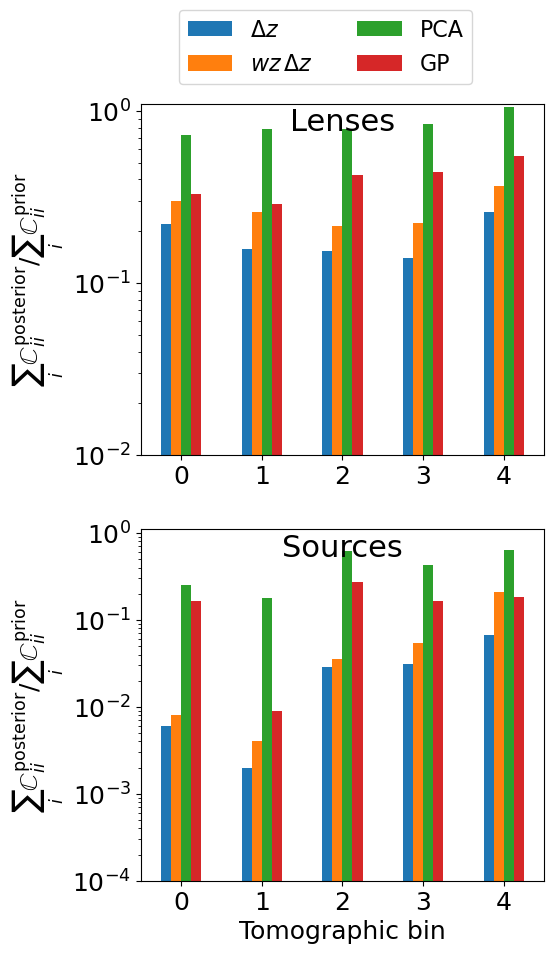

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Create dataframe from extracted table
lens_data = {
    "0": [0.22, 0.298, 0.728, 0.329],
    "1": [0.157, 0.259, 0.790, 0.288],
    "2": [0.154, 0.216, 0.787, 0.423],
    "3": [0.139, 0.222, 0.844, 0.445],
    "4": [0.259, 0.365, 1.058, 0.551],
}
source_data = {
    "0": [0.006, 0.008, 0.250, 0.167],
    "1": [0.002, 0.004, 0.180, 0.009],
    "2": [0.029, 0.036, 0.618, 0.275],
    "3": [0.031, 0.055, 0.428, 0.165],
    "4": [0.067, 0.211, 0.644, 0.184],
}

lens_df = pd.DataFrame(lens_data, index=[r"$\Delta z$", r"$wz \, \Delta z$", "PCA", "GP"]).T
source_df = pd.DataFrame(source_data, index=[r"$\Delta z$", r"$wz \, \Delta z$", "PCA", "GP"]).T
# Separate lenses and sources

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 10))
fig.add_gridspec(hspace=0.)


# Plot lenses
lens_df.plot(kind="bar", ax=axes[0])
axes[0].set_title("Lenses", y=0.9)
axes[0].set_ylabel(r"$\sum_i \mathbb{C}_{ii}^{\rm posterior} / \sum_i \mathbb{C}_{ii}^{\rm prior}$")
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(loc='upper right', ncols=2, fontsize=16, bbox_to_anchor=(0.85, 1.3))
axes[0].set_yscale('log')
axes[0].set_ylim(0.01, 1.1)

# Plot sources
source_df.plot(kind="bar", ax=axes[1])
axes[1].set_title("Sources", y=0.9)
axes[1].legend_.remove()  # Remove legend from the second plot
axes[1].set_xlabel("Tomographic bin")
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylabel(r"$\sum_i \mathbb{C}_{ii}^{\rm posterior} / \sum_i \mathbb{C}_{ii}^{\rm prior}$")
axes[1].set_ylim(0.0001, 1.1)
axes[1].set_yscale('log')

# Adjust layout
plt.tight_layout()
plt.savefig("./paper_plots/Y1_nz_cov_comp.pdf", bbox_inches='tight', pad_inches=0.1)

In [38]:
for key in data_nzs.keys():
    cov_data = np.cov(data_nzs[key])
    cov_shifts = np.cov(shifts_nzs[key], rowvar=False)
    cov_SnWs = np.cov(SnWs_nzs[key], rowvar=False)
    cov_pca = np.cov(pca_nzs[key], rowvar=False)
    cov_gp = np.cov(gp_nzs[key], rowvar=False)

    diff_shifts = np.mean(cov_shifts/cov_data)
    diff_SnWs = np.mean(cov_SnWs/np.abs(cov_data))
    diff_pca = np.mean(cov_pca/np.abs(cov_data))
    diff_gp = np.mean(cov_gp/np.abs(cov_data))
    print(key,
          " & ",
          np.round(diff_shifts, 3),
          " & ",
          np.round(diff_SnWs, 3),
          " & ",
          np.round(diff_pca, 3),
          " & ",
          np.round(diff_gp, 3),
            " \\\\"
          )
    print("\hline")

lens_0  &  0.487  &  -2.047  &  -0.107  &  0.506  \\
\hline
lens_1  &  28.225  &  13.481  &  1.41  &  0.904  \\
\hline
lens_2  &  2.426  &  -0.707  &  0.288  &  0.018  \\
\hline
lens_3  &  -0.395  &  2.071  &  0.228  &  0.205  \\
\hline
lens_4  &  9.7  &  1.891  &  -0.145  &  0.139  \\
\hline
source_0  &  0.009  &  0.0  &  -0.002  &  0.061  \\
\hline
source_1  &  0.001  &  0.008  &  0.854  &  1.242  \\
\hline
source_2  &  -0.001  &  0.018  &  0.513  &  0.502  \\
\hline
source_3  &  -0.004  &  0.003  &  0.285  &  0.343  \\
\hline
source_4  &  -0.444  &  11.068  &  -0.139  &  0.058  \\
\hline


<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_41944/1770500908.py:23: SyntaxWarning: invalid escape sequence '\h'
  print("\hline")


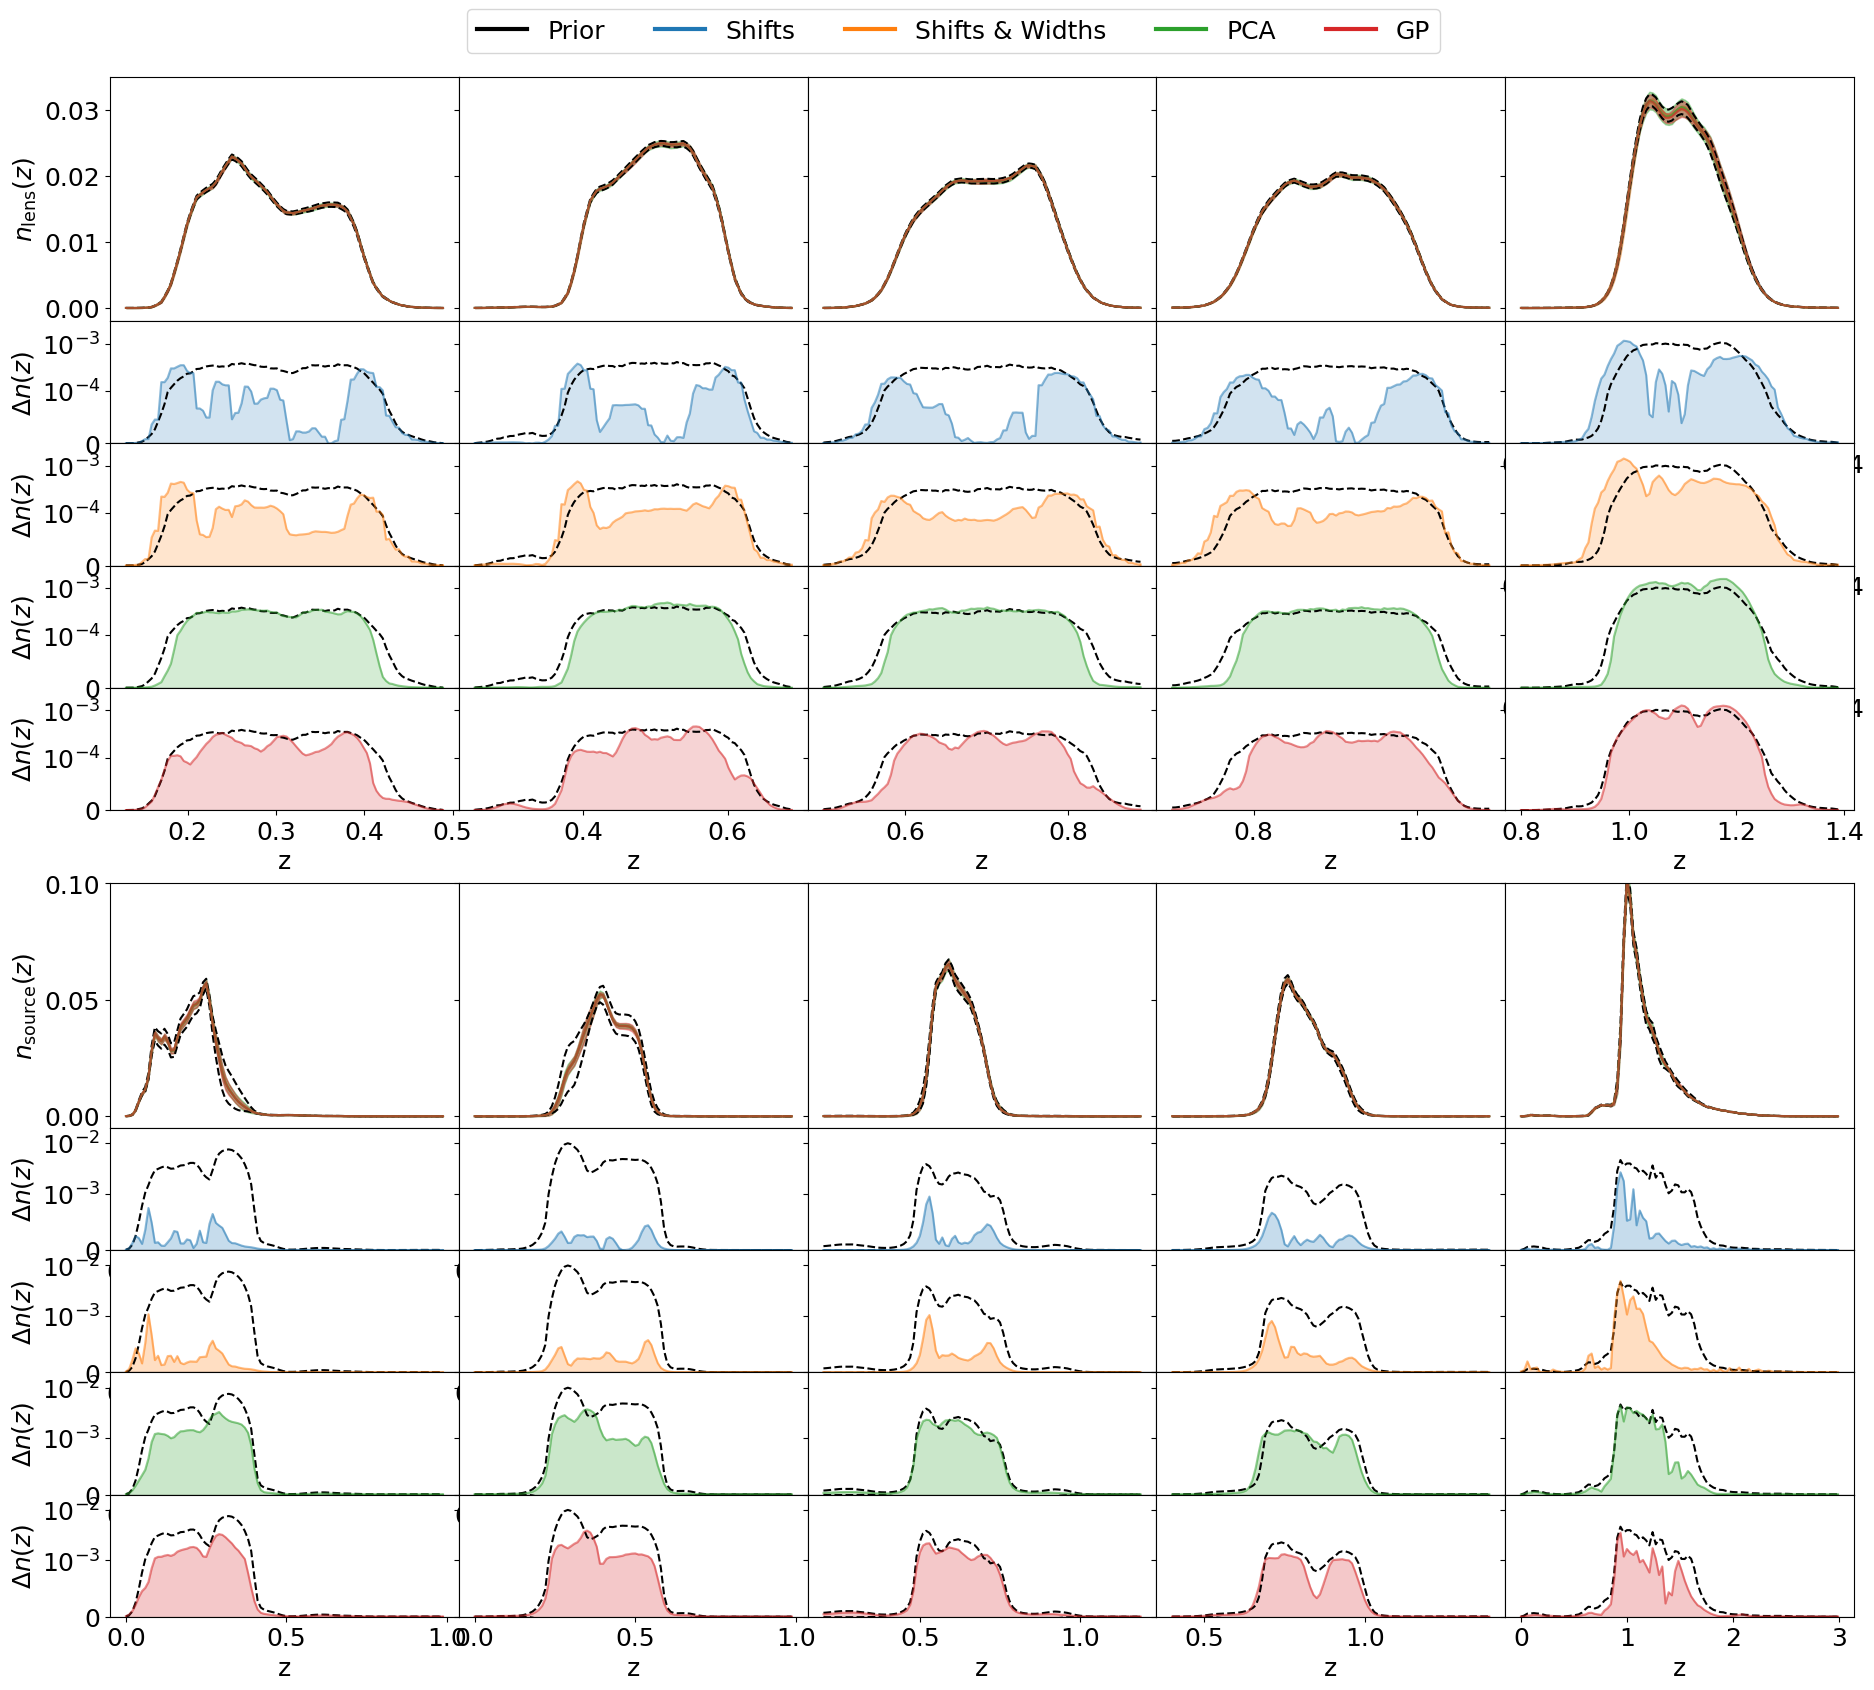

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# --- overall figure ---
fig = plt.figure(figsize=(4.5*5, 20))

# --- global GridSpec: 2 blocks (lens + source) ---
outer_gs = GridSpec(
    2, 1,
    height_ratios=[1, 1],
    hspace=0.1,   # <== bigger space between lens and source blocks
)

# --- lens block (main+diff share x) ---
gs_lens = GridSpecFromSubplotSpec(
    5, 5, subplot_spec=outer_gs[0],
    height_ratios=[1, 0.5, 0.5, 0.5, 0.5],
    hspace=0.00,
    wspace=0.00
)

# --- source block (main+diff share x) ---
gs_source = GridSpecFromSubplotSpec(
    5, 5, subplot_spec=outer_gs[1],
    height_ratios=[1, 0.5, 0.5, 0.5, 0.5],
    hspace=0.00,
    wspace=0.00,
)

axis_main = np.empty((2, 5), dtype=object)
axis_diff = np.empty((8, 5), dtype=object)

for i in range(5):
    # lens pair (sharex)
    axis_main[0, i] = fig.add_subplot(gs_lens[0, i])
    axis_diff[0, i] = fig.add_subplot(gs_lens[1, i], sharex=axis_main[0, i])
    axis_diff[1, i] = fig.add_subplot(gs_lens[2, i], sharex=axis_main[0, i])
    axis_diff[2, i] = fig.add_subplot(gs_lens[3, i], sharex=axis_main[0, i])
    axis_diff[3, i] = fig.add_subplot(gs_lens[4, i], sharex=axis_main[0, i])
    # source pair (sharex)
    axis_main[1, i] = fig.add_subplot(gs_source[0, i])
    axis_diff[4, i] = fig.add_subplot(gs_source[1, i], sharex=axis_main[1, i])
    axis_diff[5, i] = fig.add_subplot(gs_source[2, i], sharex=axis_main[1, i])
    axis_diff[6, i] = fig.add_subplot(gs_source[3, i], sharex=axis_main[1, i])
    axis_diff[7, i] = fig.add_subplot(gs_source[4, i], sharex=axis_main[1, i])

# ================================================================
# === LENS TRACERS
# ================================================================
lens_tracers = ['lens_0', 'lens_1', 'lens_2', 'lens_3', 'lens_4']
for i, t in enumerate(lens_tracers):
    ax = axis_main[0, i]
    z = nzs[t]["z"]

    # --- Main ---
    qs = np.quantile(data_nzs[t], [0.25, 0.5, 0.75], axis=1)
    lq = qs[1]-qs[0]; uq = qs[2]-qs[1]
    ax.plot(z, np.mean(shifts_nzs[t], axis=0)-lq, ls="--", color="k")
    ax.plot(z, np.mean(shifts_nzs[t], axis=0)+uq, ls="--", color="k")

    for model, color, label in [
        (shifts_nzs, "C0", "Shifts"),
        (SnWs_nzs, "C1", "Shifts & Widths"),
        (pca_nzs, "C2", "PCA"),
        (gp_nzs, "C3", "GP"),
    ]:
        qs = np.quantile(model[t], [0.25, 0.5, 0.75], axis=0)
        lq = qs[1]-qs[0]; uq = qs[2]-qs[1]
        m = np.mean(model[t], axis=0)
        ax.plot(z, m, alpha=0.6, color=color, label=label)
        ax.fill_between(z, m-lq, m+uq, alpha=0.4, color=color)

    ax.set_ylim([-0.002, 0.035])
    if i > 0: ax.set_yticklabels([])
    else: ax.set_ylabel(r"$n_{\rm lens}(z)$")
    plt.setp(ax.get_xticklabels(), visible=False)

    # --- Diff ---
    j = 0
    for model, color in [
        (shifts_nzs, "C0"),
        (SnWs_nzs, "C1"),
        (pca_nzs, "C2"),
        (gp_nzs, "C3"),
    ]:
        axd = axis_diff[j, i]
        qs = np.quantile(data_nzs[t], [0.25, 0.5, 0.75], axis=1)
        lq = qs[1]-qs[0]; uq = qs[2]-qs[1]
        axd.plot(z, -lq, ls="--", color="k")
        axd.plot(z, uq, ls="--", color="k")
        qs = np.quantile(model[t], [0.25, 0.5, 0.75], axis=0)
        lq = qs[1]-qs[0]; uq = qs[2]-qs[1]
        axd.fill_between(z, -lq, uq, alpha=0.2, color=color)
        axd.plot(z, -lq, color=color, alpha=0.5)
        axd.plot(z, uq, color=color, alpha=0.5)
        j += 1
        axd.axhline(0, color="k", lw=0.8)
        axd.set_ylim([-0.00, 0.003])
        axd.set_yscale("symlog", linthresh=0.0001)
        if i > 0: axd.set_yticklabels([])
        else: axd.set_ylabel(r"$\Delta n(z)$")
        axd.set_xlabel("z")

# ================================================================
# === SOURCE TRACERS
# ================================================================
source_tracers = ['source_0', 'source_1', 'source_2', 'source_3', 'source_4']
for i, t in enumerate(source_tracers):
    ax = axis_main[1, i]
    z = nzs[t]["z"]

    # --- Main ---
    qs = np.quantile(data_nzs[t], [0.25, 0.5, 0.75], axis=1)
    lq = qs[1]-qs[0]; uq = qs[2]-qs[1]
    ax.plot(z, np.mean(shifts_nzs[t], axis=0)-lq, ls="--", color="k")
    ax.plot(z, np.mean(shifts_nzs[t], axis=0)+uq, ls="--", color="k")

    for model, color, label in [
        (shifts_nzs, "C0", "Shifts"),
        (SnWs_nzs, "C1", "Shifts & Widths"),
        (pca_nzs, "C2", "PCA"),
        (gp_nzs, "C3", "GP"),
    ]:
        qs = np.quantile(model[t], [0.25, 0.5, 0.75], axis=0)
        lq = qs[1]-qs[0]; uq = qs[2]-qs[1]
        m = np.mean(model[t], axis=0)
        ax.plot(z, m, alpha=0.6, color=color, label=label)
        ax.fill_between(z, m-lq, m+uq, alpha=0.4, color=color)

    ax.set_ylim([-0.005, 0.1])
    if i > 0: ax.set_yticklabels([])
    else: ax.set_ylabel(r"$n_{\rm source}(z)$")
    plt.setp(ax.get_xticklabels(), visible=False)

    # --- Diff ---
    j = 4
    for model, color in [
        (shifts_nzs, "C0"),
        (SnWs_nzs, "C1"),
        (pca_nzs, "C2"),
        (gp_nzs, "C3"),
    ]:
        axd = axis_diff[j, i]
        qs = np.quantile(data_nzs[t], [0.25, 0.5, 0.75], axis=1)
        lq = qs[1]-qs[0]; uq = qs[2]-qs[1]
        axd.plot(z, -lq, ls="--", color="k")
        axd.plot(z, uq, ls="--", color="k")
        qs = np.quantile(model[t], [0.25, 0.5, 0.75], axis=0)
        lq = qs[1]-qs[0]; uq = qs[2]-qs[1]
        axd.fill_between(z, -lq, uq, alpha=0.25, color=color)
        axd.plot(z, -lq, color=color, alpha=0.5)
        axd.plot(z, uq, color=color, alpha=0.5)
        j += 1
        axd.axhline(0, color="k", lw=0.8)
        axd.set_ylim([-0.0, 0.02])
        axd.set_yscale("symlog", linthresh=0.001)
        if i > 0: axd.set_yticklabels([])
        else: axd.set_ylabel(r"$\Delta n(z)$")
        axd.set_xlabel("z")

# ================================================================
# Legend and save
# ================================================================
labels = ["Prior", "Shifts", "Shifts & Widths", "PCA", "GP"]
colors = ["k", "C0", "C1", "C2", "C3"]
lines = [plt.Line2D([0], [0], color=c, lw=3) for c in colors]
fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, 0.92))

fig.savefig("./paper_plots/Y1_nz_comparison.pdf", bbox_inches='tight')

## Trace plots

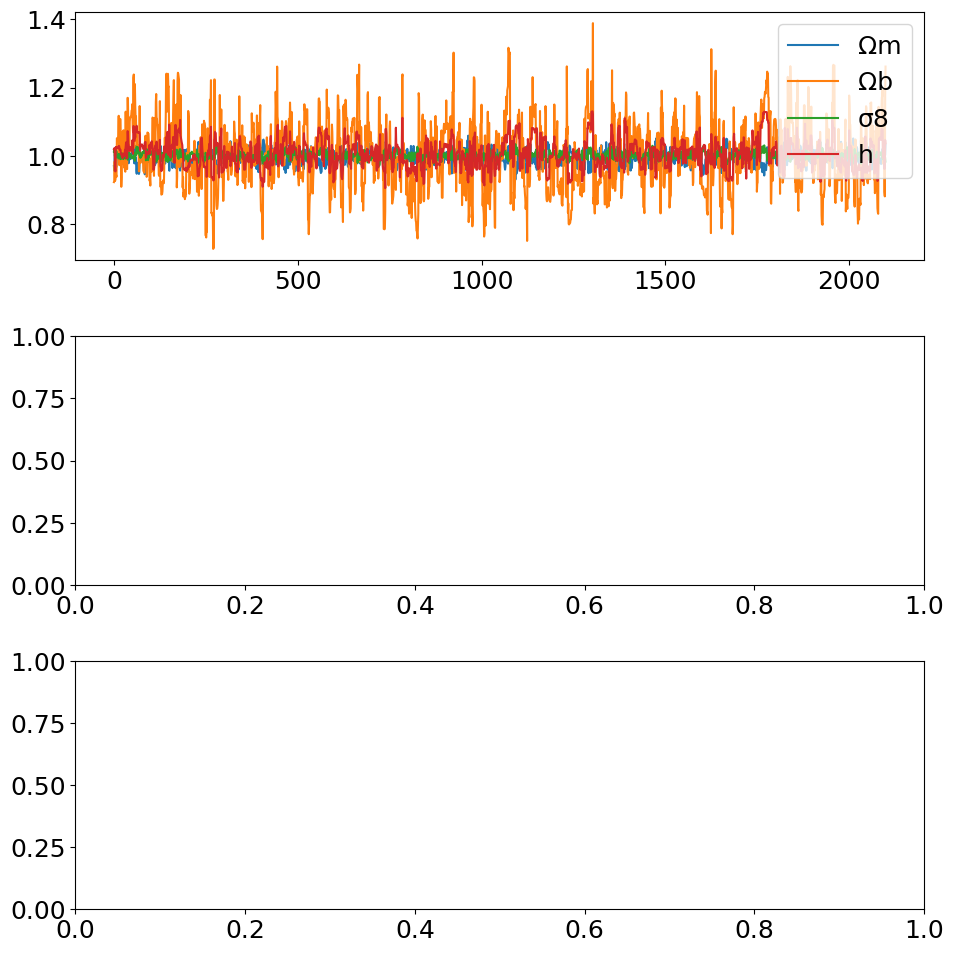

In [40]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
chain = chain_Y1_3x2_nomarg
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
#axs[1].plot(np.array(chain_Y1_gcgc_nomarg["Ωm"])/0.27347, label="Ωm")
#axs[1].plot(np.array(chain_Y1_gcgc_nomarg["Ωb"])/0.04217, label="Ωb")
#axs[1].plot(np.array(chain_Y1_gcgc_nomarg["σ8"])/0.779007, label="σ8")
#axs[1].plot(np.array(chain_Y1_gcgc_nomarg["h"])/0.71899, label="h")
#axs[1].legend()
# Second plot
#axs[2].plot(np.array(chain_Y1_wlwl_nomarg["Ωm"])/0.27347, label="Ωm")
#axs[2].plot(np.array(chain_Y1_wlwl_nomarg["Ωb"])/0.04217, label="Ωb")
#axs[2].plot(np.array(chain_Y1_wlwl_nomarg["σ8"])/0.779007, label="σ8")
#axs[2].plot(np.array(chain_Y1_wlwl_nomarg["h"])/0.71899, label="h")
#axs[2].legend()

plt.tight_layout()
plt.show()

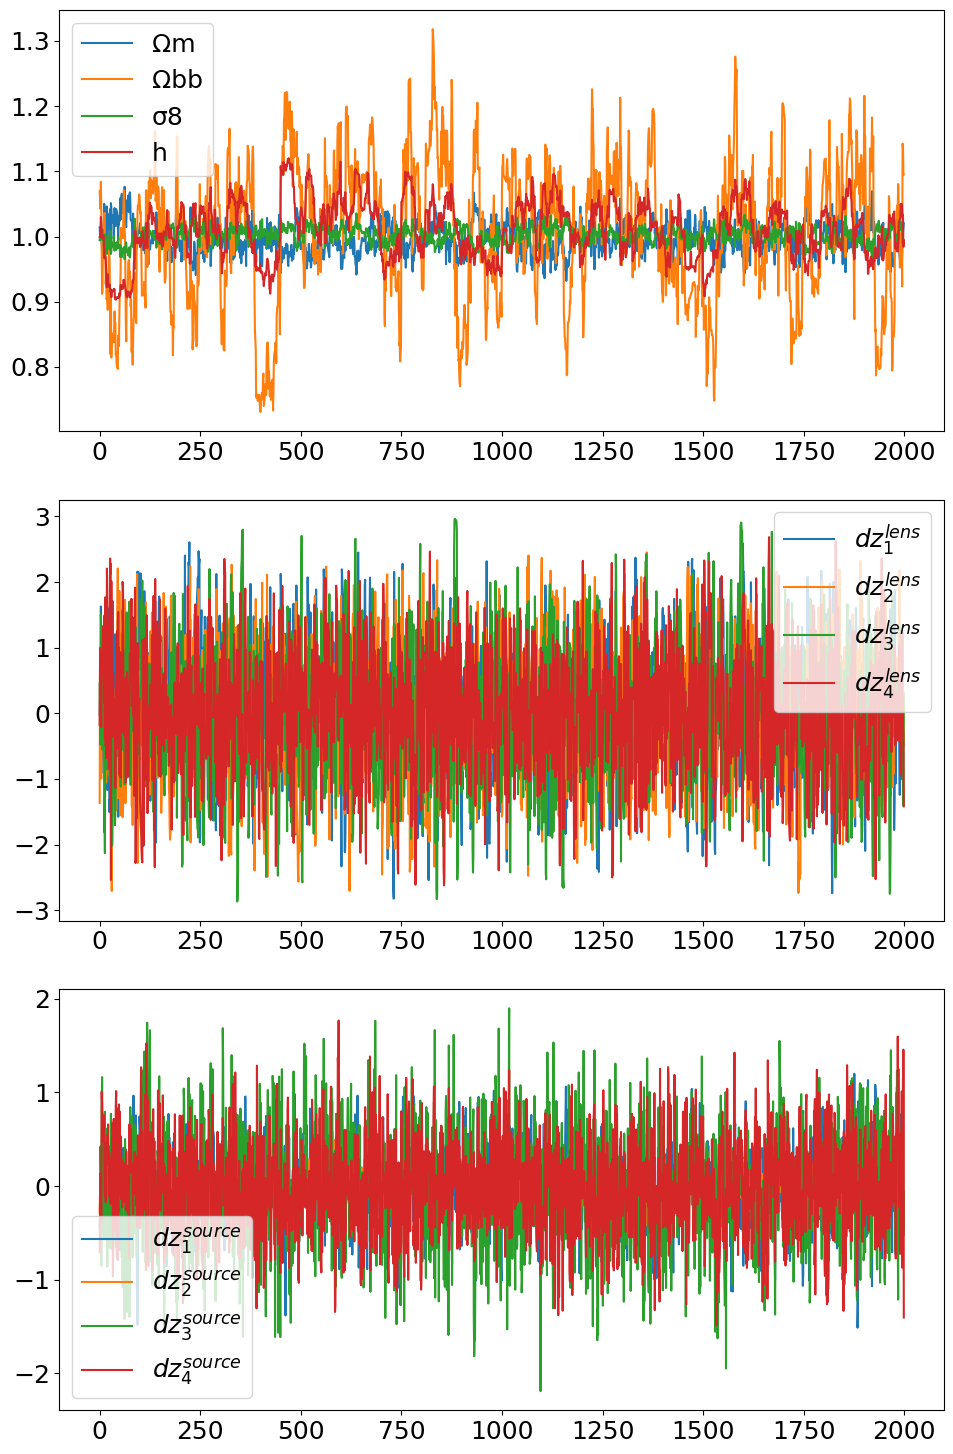

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_Y1_3x2_dz_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωbb"])/0.4217, label="Ωbb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{source}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{source}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{source}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

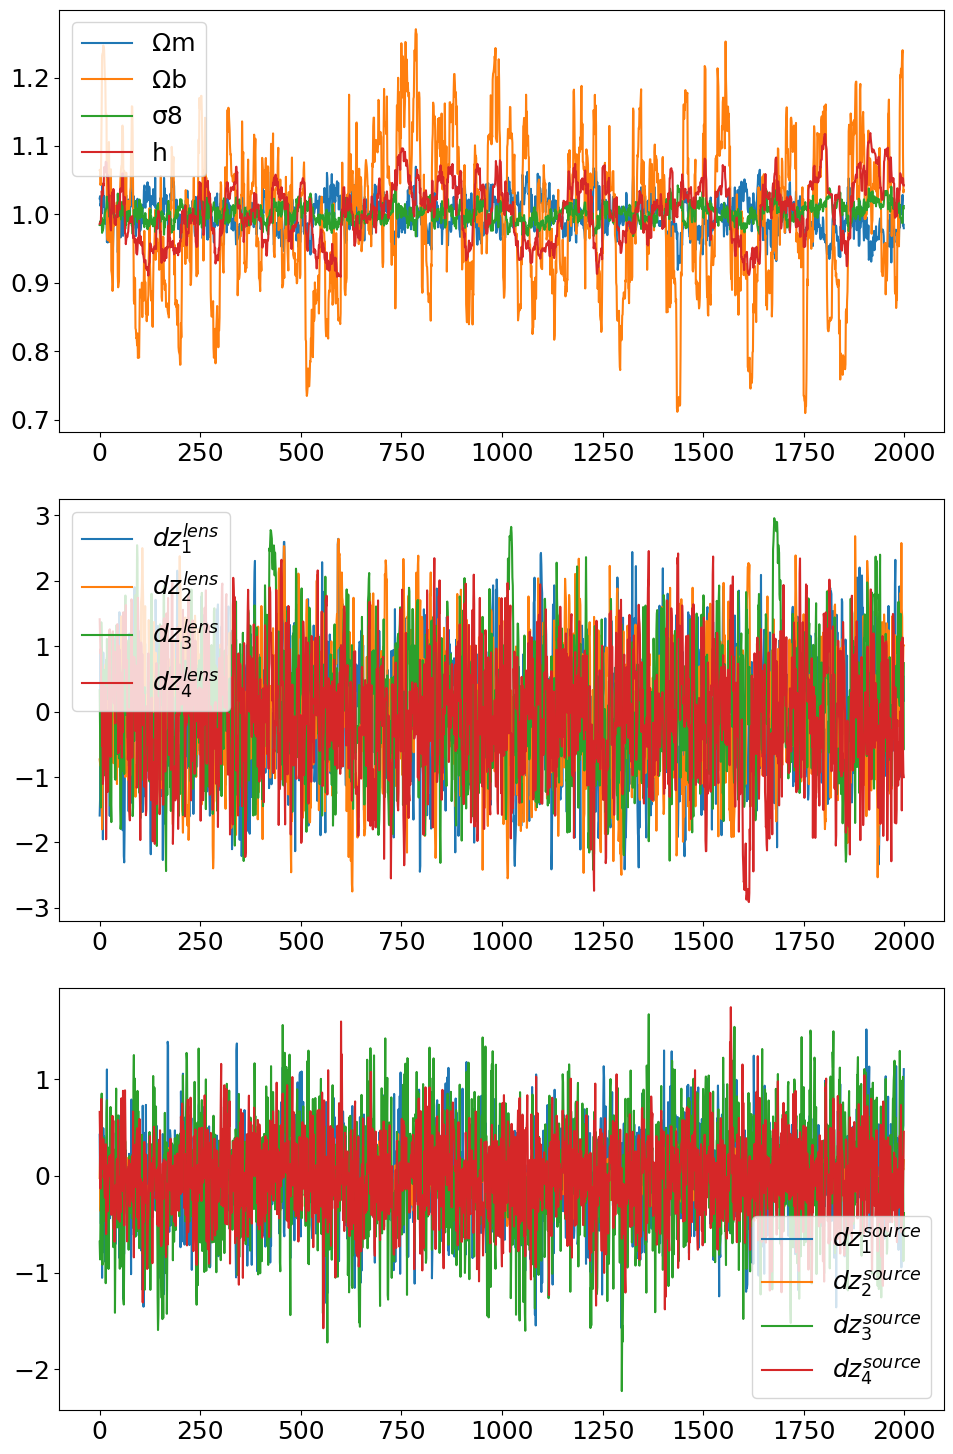

In [42]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_Y1_3x2_wzdz_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{source}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{source}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{source}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

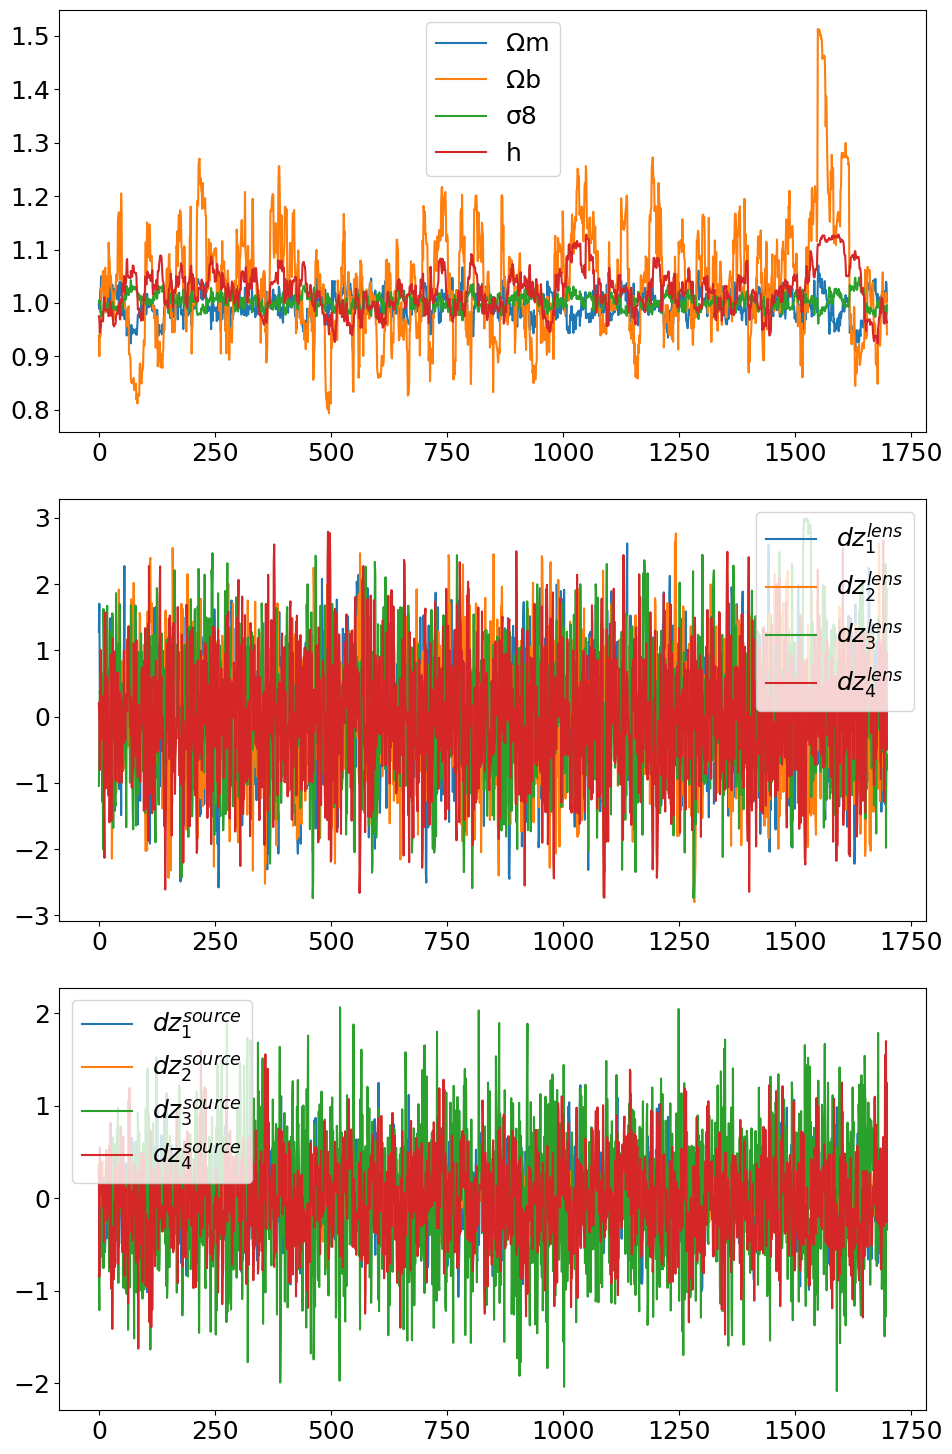

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_Y1_3x2_PCA_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["alphas_lens_0[1]"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["alphas_lens_1[1]"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["alphas_lens_2[1]"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["alphas_lens_3[1]"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{source}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{source}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{source}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

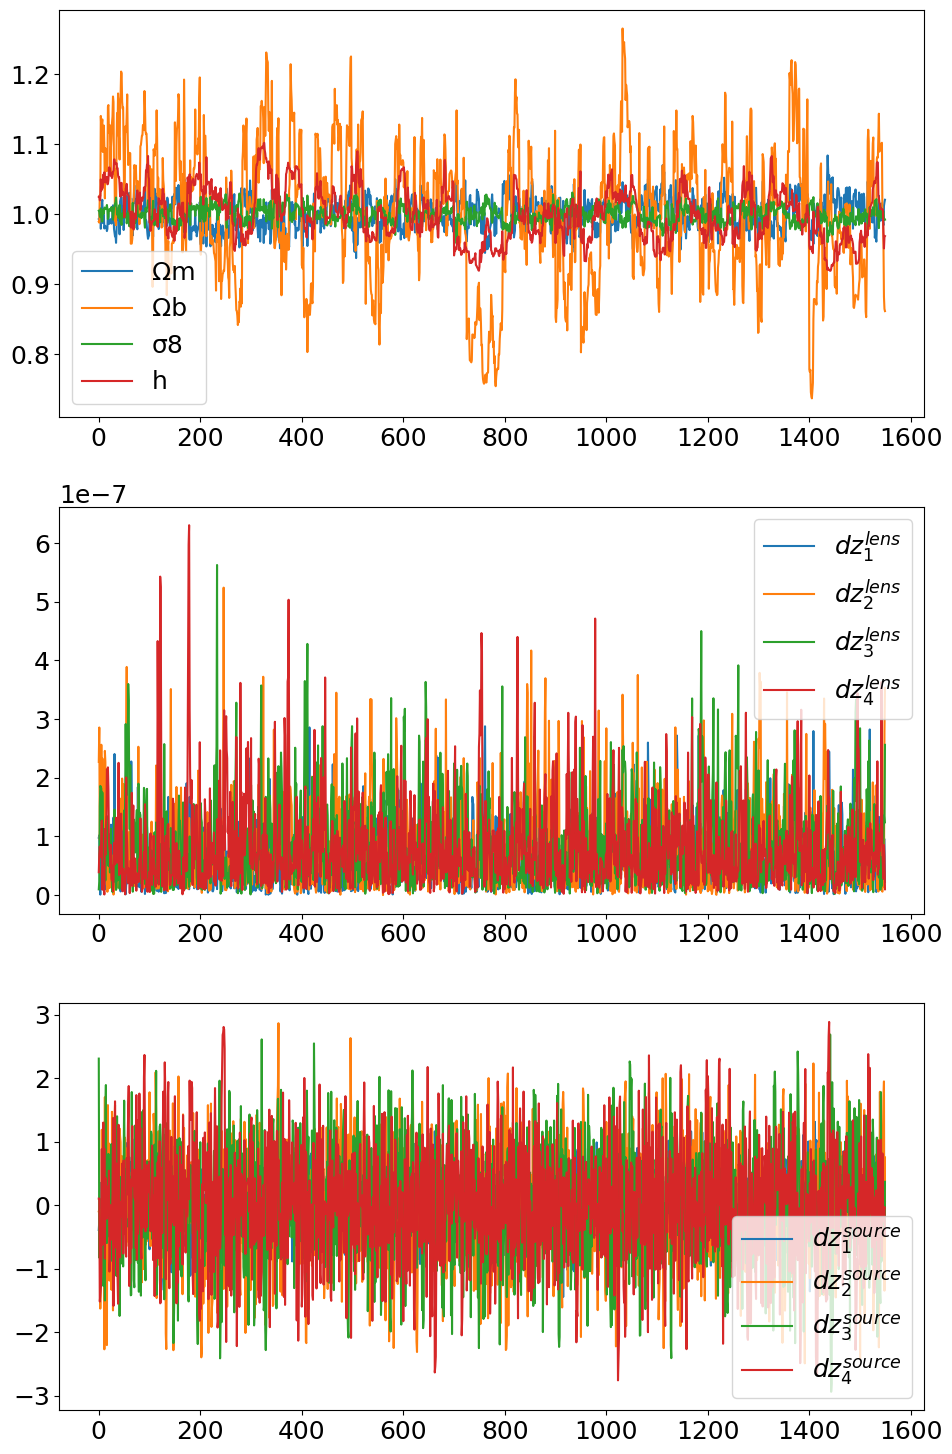

In [44]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
chain = chain_Y1_3x2_gp_num
# First plot
axs[0].plot(np.array(chain["Ωm"])/0.27347, label="Ωm")
axs[0].plot(np.array(chain["Ωb"])/0.04217, label="Ωb")
axs[0].plot(np.array(chain["σ8"])/0.779007, label="σ8")
axs[0].plot(np.array(chain["h"])/0.71899, label="h")
axs[0].legend()
# Second plot
axs[1].plot(np.array(chain["dnz_lens_0"]), label=r"$dz^{lens}_1$")
axs[1].plot(np.array(chain["dnz_lens_1"]), label=r"$dz^{lens}_2$")
axs[1].plot(np.array(chain["dnz_lens_2"]), label=r"$dz^{lens}_3$")
axs[1].plot(np.array(chain["dnz_lens_3"]), label=r"$dz^{lens}_4$")
axs[1].legend()
# Third plot
axs[2].plot(np.array(chain["alphas_source_0[1]"]), label=r"$dz^{source}_1$")
axs[2].plot(np.array(chain["alphas_source_1[1]"]), label=r"$dz^{source}_2$")
axs[2].plot(np.array(chain["alphas_source_2[1]"]), label=r"$dz^{source}_3$")
axs[2].plot(np.array(chain["alphas_source_3[1]"]), label=r"$dz^{source}_4$")
axs[2].legend()

plt.tight_layout()
plt.show()

## Posteriors

In [45]:
labels_dict = {'h': 'h',
               'Ωm': r'\Omega_{\rm m}',
               'Ωb': r'\Omega_{\rm b}',
               'ns': r'n_{\rm s}',
               'σ8': r'\sigma_{\rm 8}',
               'S8': r'S_{\rm 8}',

               'lens_b': r'\langle b_{\rm g} \rangle',
               'lens_0_b': r'b_{\rm g}^0',
               'lens_1_b': r'b_{\rm g}^1',
               'lens_2_b': r'b_{\rm g}^2',
               'lens_3_b': r'b_{\rm g}^3',
               'lens_4_b': r'b_{\rm g}^4',

               'dnz_lens': r'\langle \delta n(z)_{lens}\rangle',
               'dnz_lens_0': r'\delta n(z)_{lens^{0}}',
               'dnz_lens_1': r'\delta n(z)_{lens^{1}}',
               'dnz_lens_2': r'\delta n(z)_{lens^{2}}',
               'dnz_lens_3': r'\delta n(z)_{lens^{3}}',
               'dnz_lens_4': r'\delta n(z)_{lens^{4}}',
               'dnz_source': r'\langle \delta n(z)_{source}\rangle',
               'dnz_source_0': r'\delta n(z)_{source^{0}}',
               'dnz_source_1': r'\delta n(z)_{source^{1}}',
               'dnz_source_2': r'\delta n(z)_{source^{2}}',
               'dnz_source_3': r'\delta n(z)_{source^{3}}',
               'dnz_source_4': r'\delta n(z)_{source^{4}}',

               'dz_lens_0': r'\Delta^{0}_{z, lens}',
               'dz_lens_1': r'\Delta^{1}_{z, lens}',
               'dz_lens_2': r'\Delta^{2}_{z, lens}',
               'dz_lens_3': r'\Delta^{3}_{z, lens}',
               'dz_lens_4': r'\Delta^{4}_{z, lens}',
               'dz_source_0': r'\Delta^{0}_{z, source}',
               'dz_source_1': r'\Delta^{1}_{z, source}',
               'dz_source_2': r'\Delta^{2}_{z, source}',
               'dz_source_3': r'\Delta^{3}_{z, source}',
               'dz_source_4': r'\Delta^{4}_{z, source}', 

               'wz_lens_0': r'w^{0}_{z, lens}',
               'wz_lens_1': r'w^{1}_{z, lens}',
               'wz_lens_2': r'w^{2}_{z, lens}',
               'wz_lens_3': r'w^{3}_{z, lens}',
               'wz_lens_4': r'w^{4}_{z, lens}',
               'wz_source_0': r'w^{0}_{z, source}',
               'wz_source_1': r'w^{1}_{z, source}',
               'wz_source_2': r'w^{2}_{z, source}',
               'wz_source_3': r'w^{3}_{z, source}',
               'wz_source_4': r'w^{4}_{z, source}',
               
               'A_IA': 'A_{IA}',
               
               'Xi2': r'\chi^2',}

In [46]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [47]:
samples_wzdz_prior = make_chain(prior_wzdz_chain, r"Prior", labels_dict=labels_dict)

Prior
Removed no burn in


In [48]:
samples_3x2_Y1_nomarg = make_chain(chain_Y1_3x2_nomarg, "LSSTY1 3x2pt - Fixed")

samples_3x2_Y1_dz_ana = make_chain(chain_Y1_3x2_dz_ana, r"LSSTY1 3x2pt - $\Delta_z$ Analytical")
samples_3x2_Y1_wzdz_ana = make_chain(chain_Y1_3x2_wzdz_ana, r"LSSTY1 3x2pt - $w_z \, \Delta_z$ Analytical")
samples_3x2_Y1_PCA_ana = make_chain(chain_Y1_3x2_PCA_ana, r"LSSTY1 3x2pt - PCA Analytical")
samples_3x2_Y1_gp_ana = make_chain(chain_Y1_3x2_gp_ana, r"LSSTY1 3x2pt - GP Analytical")

samples_3x2_Y1_dz_num = make_chain(chain_Y1_3x2_dz_num, r"LSSTY1 3x2pt - $\Delta_z$ Numerical")
samples_3x2_Y1_wzdz_num = make_chain(chain_Y1_3x2_wzdz_num, r"LSSTY1 3x2pt - $w_z \, \Delta_z$ Numerical")
samples_3x2_Y1_PCA_num = make_chain(chain_Y1_3x2_PCA_num, r"LSSTY1 3x2pt - PCA Numerical")
samples_3x2_Y1_gp_num = make_chain(chain_Y1_3x2_gp_num, r"LSSTY1 3x2pt - GP Numerical")

#samples_wlwl_Y1_nomarg = make_chain(chain_Y1_wlwl_nomarg, "Y1 Fixed - WLWL")
#samples_gcgc_Y1_nomarg = make_chain(chain_Y1_3x2_nomarg, "Y1 Fixed - GCGC")

LSSTY1 3x2pt - Fixed
Removed no burn in
LSSTY1 3x2pt - $\Delta_z$ Analytical
Removed no burn in
LSSTY1 3x2pt - $w_z \, \Delta_z$ Analytical
Removed no burn in
LSSTY1 3x2pt - PCA Analytical
Removed no burn in
LSSTY1 3x2pt - GP Analytical
Removed no burn in
LSSTY1 3x2pt - $\Delta_z$ Numerical
Removed no burn in
LSSTY1 3x2pt - $w_z \, \Delta_z$ Numerical
Removed no burn in
LSSTY1 3x2pt - PCA Numerical
Removed no burn in
LSSTY1 3x2pt - GP Numerical
Removed no burn in


In [49]:
prat_markers = {'h': 0.7189925511925751,
               'Ωm': 0.2734714358876248,
               'Ωb': 0.042170616570847225,
               'ns': 0.9965136823002241,
               'σ8': 0.7790071910238021,
               'lens_0_b':0.879118,
               'lens_1_b':1.05894, 
               'lens_2_b':1.22145, 
               'lens_3_b':1.35065, 
               'lens_4_b':1.58909,
               'A_IA':0.25179439}
prat_markers['S8'] = prat_markers['σ8']*np.sqrt(prat_markers['Ωm']/0.3)

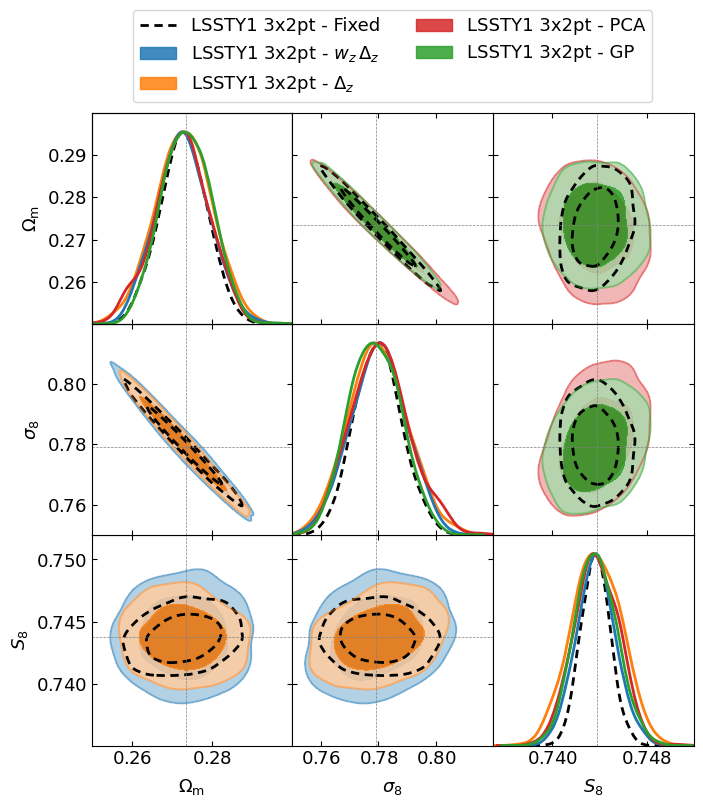

In [50]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_Y1_nomarg,
                samples_3x2_Y1_wzdz_num,
                samples_3x2_Y1_dz_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_Y1_nomarg,
                                samples_3x2_Y1_PCA_num,
                                samples_3x2_Y1_gp_num,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C3', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C1'},
                           {'color':'C0'}], 
                colors=["black", 'C0', 'C1'],
                param_limits={'Ωm':(0.25, 0.3), 'σ8':(0.75, 0.82), 'S8':(0.735, 0.752)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers, 
                 legend_labels= [r"LSSTY1 3x2pt - Fixed",
                          r"LSSTY1 3x2pt - $w_z \, \Delta_z$",
                          r"LSSTY1 3x2pt - $\Delta_z$",
                            r"LSSTY1 3x2pt - PCA",
                            r"LSSTY1 3x2pt - GP"
                          ],)
g.export("./paper_plots/Y1_triangle_comp.pdf")

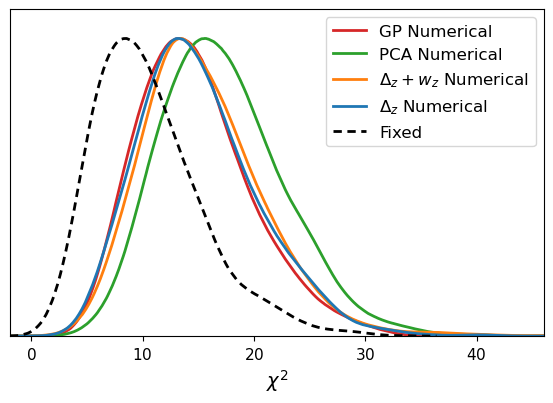

In [51]:
g = plots.get_single_plotter(width_inch=6)
g.plot_1d([
    samples_3x2_Y1_dz_num,
    samples_3x2_Y1_wzdz_num,
    samples_3x2_Y1_PCA_num,
    samples_3x2_Y1_gp_num,
    samples_3x2_Y1_nomarg,
    ], 'Xi2', 
    colors=['C3', 'C2', 'C1', 'C0', "black"],
    ls=['-', '-', '-', '-', '--'], 
    lws=2)
g.add_legend(['GP Numerical', 'PCA Numerical', r'$\Delta_z + w_z$ Numerical', r'$\Delta_z$ Numerical', 'Fixed'])

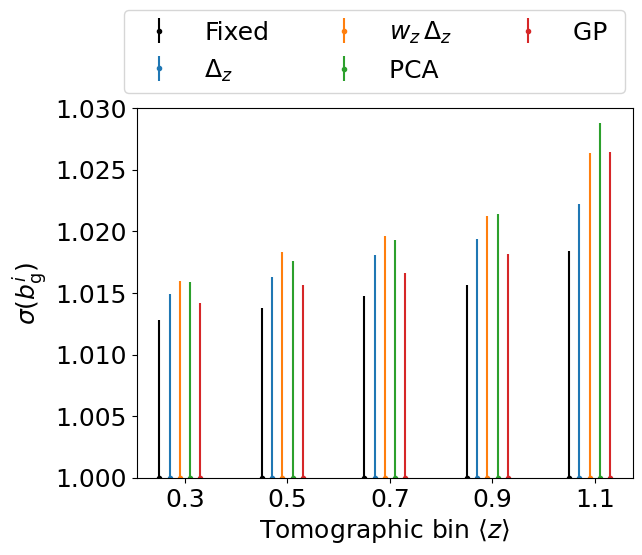

In [52]:
zarr = [0.3, 0.5, 0.7, 0.9, 1.1]
chains = [chain_Y1_3x2_nomarg,
          chain_Y1_3x2_dz_num,
          chain_Y1_3x2_wzdz_num,
          chain_Y1_3x2_PCA_num,
          chain_Y1_3x2_gp_num,
          ]
e = -0.05
colors = ['black', 'C0', 'C1', 'C2', 'C3']
labels = ['Fixed', r'$\Delta_z$ ', r'$w_z \, \Delta_z$ ', 'PCA ',  'GP ']
for i, chain in enumerate(chains):
    lens_b_1_m, lens_b_1_s = np.mean(chain['lens_0_b']), np.std(chain['lens_0_b'])
    lens_b_2_m, lens_b_2_s = np.mean(chain['lens_1_b']), np.std(chain['lens_1_b'])
    lens_b_3_m, lens_b_3_s = np.mean(chain['lens_2_b']), np.std(chain['lens_2_b'])
    lens_b_4_m, lens_b_4_s = np.mean(chain['lens_3_b']), np.std(chain['lens_3_b'])
    lens_b_5_m, lens_b_5_s = np.mean(chain['lens_4_b']), np.std(chain['lens_4_b'])
    means = np.array([lens_b_1_m, lens_b_2_m, lens_b_3_m, lens_b_4_m, lens_b_5_m])
    errs = np.array([lens_b_1_s, lens_b_2_s, lens_b_3_s, lens_b_4_s, lens_b_5_s])
    mean = np.mean(means)
    #errs /= means
    #means /= means
    color = colors[i]
    label = labels[i]
    plt.errorbar(np.array(zarr)+e, np.ones_like(means), yerr=errs, fmt='.', color=color, label=label)
    plt.xticks(zarr)
    plt.xlabel(r'Tomographic bin $\langle z \rangle$')
    plt.ylabel(r'$\sigma (b_{\rm g}^i)$')
    plt.legend(ncols=3, bbox_to_anchor=(-0.05, 1.3), loc='upper left')
    plt.ylim(1, 1.03)
    e += 0.02
plt.savefig("./paper_plots/Y1_lens_bias_comp.pdf", bbox_inches='tight', pad_inches=0.1)

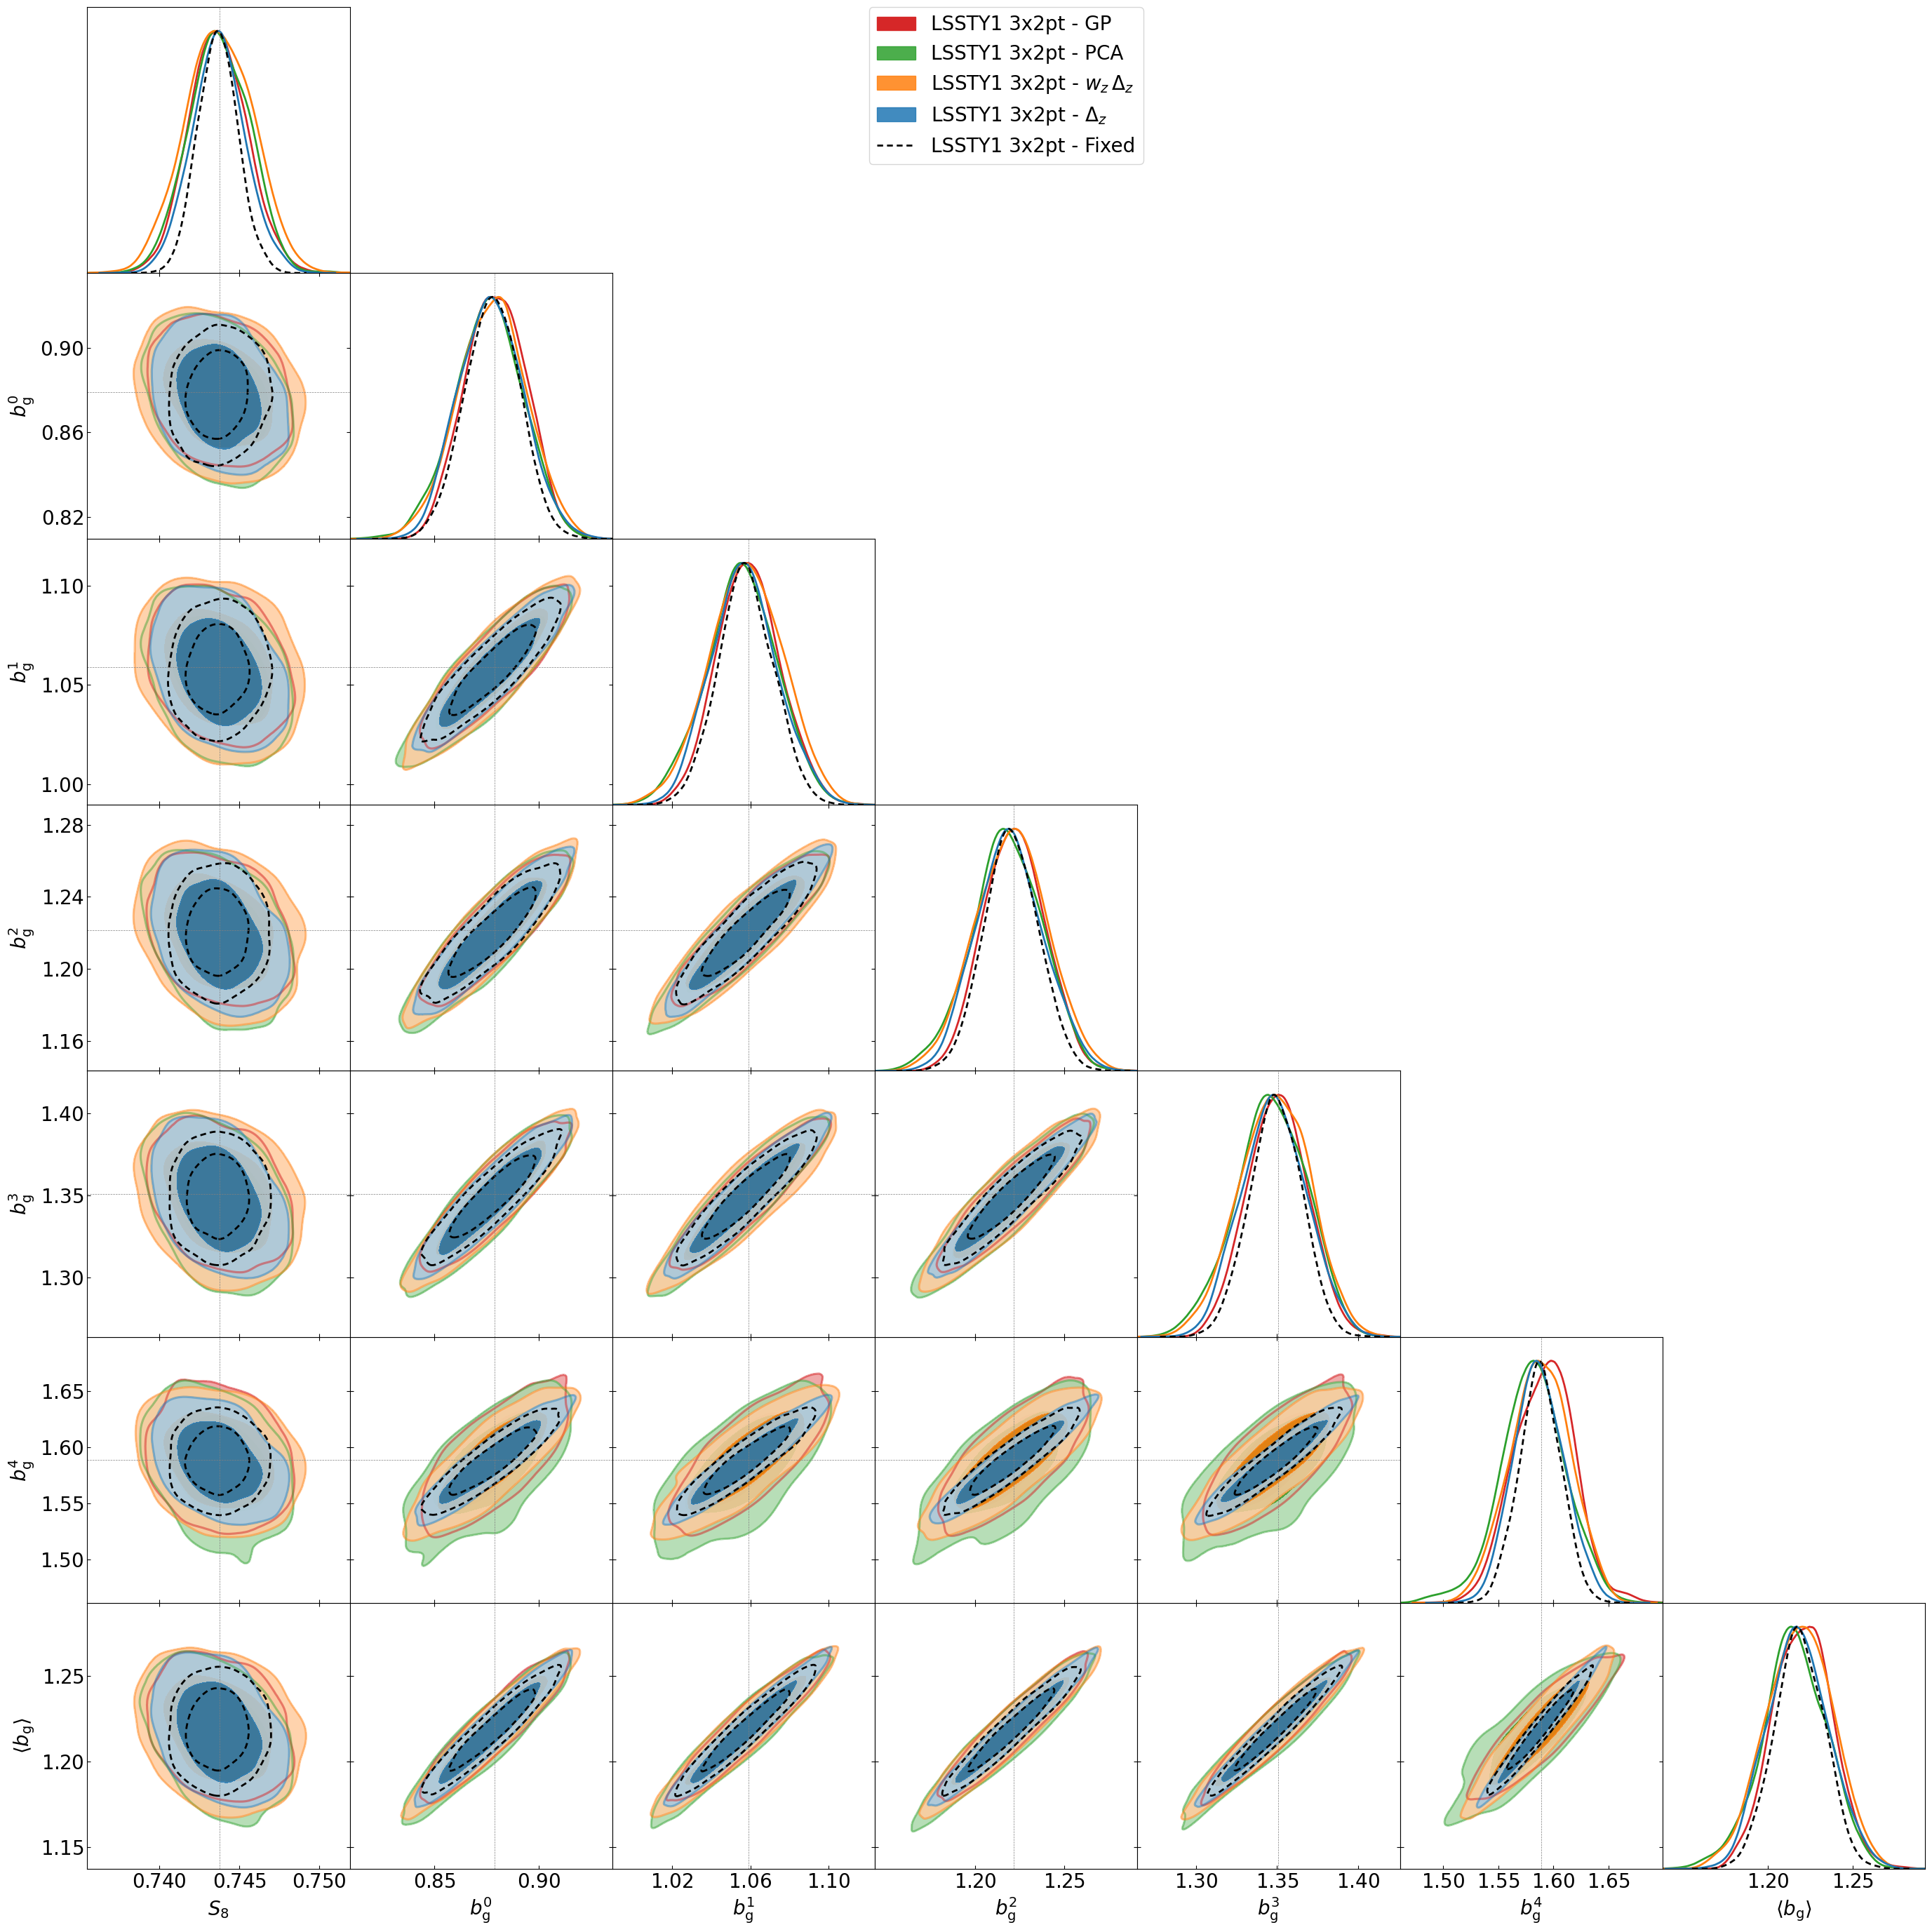

In [53]:
g = plots.getSubplotPlotter(subplot_size=4)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
    samples_3x2_Y1_gp_num,
    samples_3x2_Y1_PCA_num,
    samples_3x2_Y1_wzdz_num,
    samples_3x2_Y1_dz_num,
    samples_3x2_Y1_nomarg,
    ],
    ['S8', 
    'lens_0_b',
    'lens_1_b',
    'lens_2_b',
    'lens_3_b',
    'lens_4_b',
     'lens_b'],
    line_args=[
            {'color':'C3'},
            {'color':'C2'},
            {'color':'C1'},
            {'color':'C0'},
            {'color':'black'}], 
    colors=['C3', 'C2', 'C1', 'C0', "black"],
    #param_limits={'S8':(0.65, 0.8), 
    #            'lens_0_b':(0.6, 1.3),
    #            'lens_1_b':(0.7, 1.6),
    #            'lens_2_b':(0.8, 1.8),
    #            'lens_3_b':(0.8, 2.1),
    #            'lens_4_b':(1., 2.2),
    #            },
    filled=[True, True, True, True, False],
    contour_ls=['-', '-', '-', '-', '--'], 
    contour_lws=2,
    markers=prat_markers,
    legend_labels= [
        r"LSSTY1 3x2pt - GP",
        r"LSSTY1 3x2pt - PCA",
        r"LSSTY1 3x2pt - $w_z \, \Delta_z$",
        r"LSSTY1 3x2pt - $\Delta_z$",
        r"LSSTY1 3x2pt - Fixed",
        ],)
g.export("./paper_plots/Y1_triangle_bias.pdf")

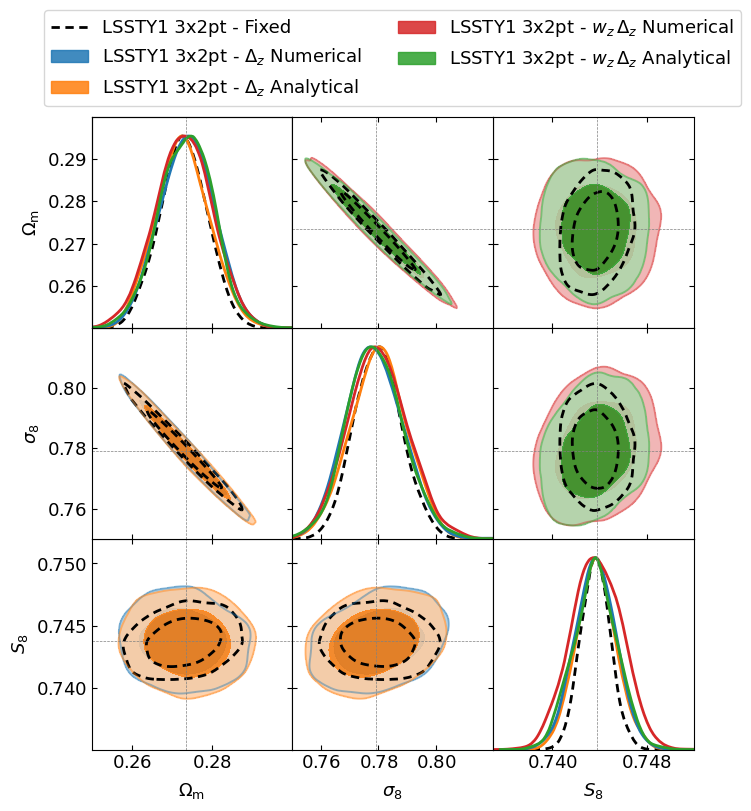

In [54]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_Y1_nomarg,
                samples_3x2_Y1_dz_num,
                samples_3x2_Y1_dz_ana,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_Y1_nomarg,
                                samples_3x2_Y1_wzdz_num,
                                samples_3x2_Y1_wzdz_ana,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C3', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C1'},
                           {'color':'C0'}], 
                colors=["black", 'C0', 'C1'],
                param_limits={'Ωm':(0.25, 0.3), 'σ8':(0.75, 0.82), 'S8':(0.735, 0.752)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/Y1_triangle_1.pdf")

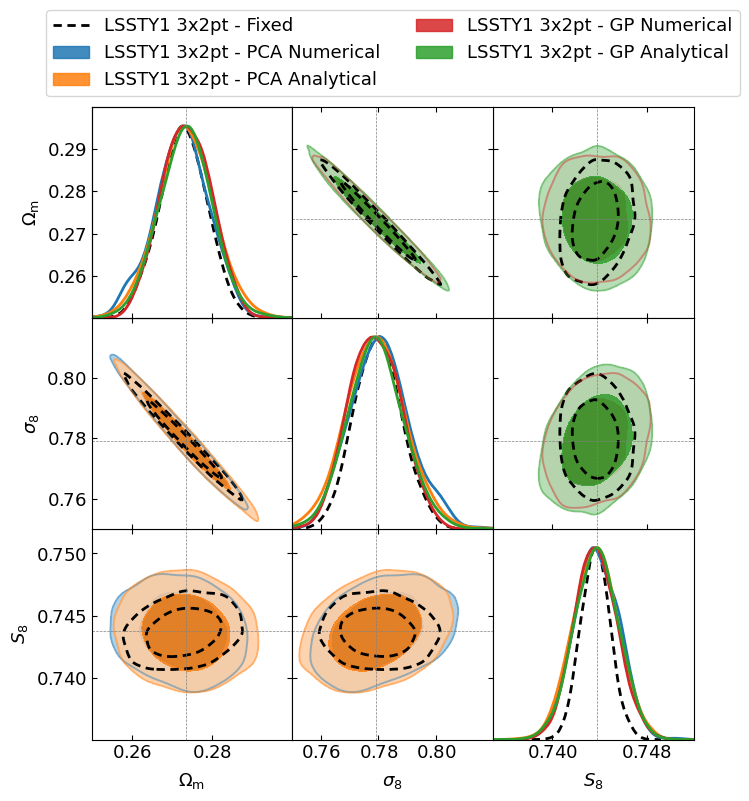

In [55]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_Y1_nomarg,
                 samples_3x2_Y1_PCA_num,
                 samples_3x2_Y1_PCA_ana,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_Y1_nomarg,
                                samples_3x2_Y1_gp_num,
                                samples_3x2_Y1_gp_ana,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C3', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':2}, 
                line_args=[{'color':'black'},
                           {'color':'C0'},
                           {'color':'C1'}], 
                colors=["black", 'C0', 'C1'],
                param_limits={'Ωm':(0.25, 0.3), 'σ8':(0.75, 0.82), 'S8':(0.735, 0.752)},
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=2,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/Y1_triangle_2.pdf")

In [56]:
S8_dz_num = chain_Y1_3x2_dz_num["σ8"] * np.sqrt(chain_Y1_3x2_dz_num["Ωm"] / 0.3)
S8_wzdz_num = chain_Y1_3x2_wzdz_num["σ8"] * np.sqrt(chain_Y1_3x2_wzdz_num["Ωm"] / 0.3) 
S8_PCA_num = chain_Y1_3x2_PCA_num["σ8"] * np.sqrt(chain_Y1_3x2_PCA_num["Ωm"] / 0.3)
S8_gp_num = chain_Y1_3x2_gp_num["σ8"]  * np.sqrt(chain_Y1_3x2_gp_num["Ωm"] / 0.3)

print("S8 dz num: ", np.round(np.mean(S8_dz_num), 4), "+/-", np.round(np.std(S8_dz_num), 4))
print("S8 wzdz num: ", np.round(np.mean(S8_wzdz_num), 4), "+/-", np.round(np.std(S8_wzdz_num), 4))
print("S8 PCA num: ", np.round(np.mean(S8_PCA_num), 4), "+/-", np.round(np.std(S8_PCA_num), 4))
print("S8 gp num: ", np.round(np.mean(S8_gp_num), 4), "+/-", np.round(np.std(S8_gp_num), 4))

S8 dz num:  0.7437 +/- 0.0016
S8 wzdz num:  0.7438 +/- 0.0021
S8 PCA num:  0.7438 +/- 0.0018
S8 gp num:  0.7437 +/- 0.0018


In [57]:
def make_table(params):
    for param in params:
        if param == "S8":
            param_nomarg = chain_Y1_3x2_nomarg["σ8"] * np.sqrt(chain_Y1_3x2_nomarg["Ωm"] / 0.3)
            param_dz_ana = chain_Y1_3x2_dz_ana["σ8"] * np.sqrt(chain_Y1_3x2_dz_ana["Ωm"] / 0.3)
            param_wzdz_ana = chain_Y1_3x2_wzdz_ana["σ8"] * np.sqrt(chain_Y1_3x2_wzdz_ana["Ωm"] / 0.3)
            param_PCA_ana = chain_Y1_3x2_PCA_ana["σ8"] * np.sqrt(chain_Y1_3x2_PCA_ana["Ωm"] / 0.3)
            param_gp_ana = chain_Y1_3x2_gp_ana["σ8"] * np.sqrt(chain_Y1_3x2_gp_ana["Ωm"] / 0.3)
            param_dz_num = chain_Y1_3x2_dz_num["σ8"] * np.sqrt(chain_Y1_3x2_dz_num["Ωm"] / 0.3)
            param_wzdz_num = chain_Y1_3x2_wzdz_num["σ8"] * np.sqrt(chain_Y1_3x2_wzdz_num["Ωm"] / 0.3) 
            param_PCA_num = chain_Y1_3x2_PCA_num["σ8"] * np.sqrt(chain_Y1_3x2_PCA_num["Ωm"] / 0.3)
            param_gp_num = chain_Y1_3x2_gp_num["σ8"]  * np.sqrt(chain_Y1_3x2_gp_num["Ωm"] / 0.3)
        else:
            param_nomarg = chain_Y1_3x2_nomarg[param]
            param_dz_ana = chain_Y1_3x2_dz_ana[param]
            param_wzdz_ana = chain_Y1_3x2_wzdz_ana[param]
            param_PCA_ana = chain_Y1_3x2_PCA_ana[param]
            param_gp_ana = chain_Y1_3x2_gp_ana[param]
            param_dz_num = chain_Y1_3x2_dz_num[param]
            param_wzdz_num = chain_Y1_3x2_wzdz_num[param]
            param_PCA_num = chain_Y1_3x2_PCA_num[param]
            param_gp_num = chain_Y1_3x2_gp_num[param]

        p = 4
        print("\\multirow{ 2 }{*} {$", labels_dict[param], "$}",
            "& \\multirow{ 2 }{*} {", np.round(np.mean(param_nomarg),p), "$\pm$", np.round(np.std(param_nomarg),p), "}",
            "&", np.round(np.mean(param_dz_num),p), "$\pm$", np.round(np.std(param_dz_num),p),
            "&", np.round(np.mean(param_wzdz_num),p), "$\pm$", np.round(np.std(param_wzdz_num),p),
            "&", np.round(np.mean(param_PCA_num),p), "$\pm$", np.round(np.std(param_PCA_num),p),
            "&", np.round(np.mean(param_gp_num),p), "$\pm$", np.round(np.std(param_gp_num),p),
            "\\\\")
        print("&",
            "&", np.round(np.mean(param_dz_num),p), "$\pm$", np.round(np.std(param_dz_ana),p),
            "&", np.round(np.mean(param_wzdz_num),p), "$\pm$", np.round(np.std(param_wzdz_ana),p),
            "&", np.round(np.mean(param_PCA_num),p), "$\pm$", np.round(np.std(param_PCA_ana),p),
            "&", np.round(np.mean(param_gp_num),p), "$\pm$", np.round(np.std(param_gp_ana),p),
            "\\\\")
        print("\\hline")


<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_41944/783105686.py:26: SyntaxWarning: invalid escape sequence '\p'


In [58]:
make_table(["Ωm", "σ8", "S8", "Ωb", "h", "ns", "A_IA", "lens_0_b", "lens_1_b", "lens_2_b", "lens_3_b", "lens_4_b"])

\multirow{ 2 }{*} {$ \Omega_{\rm m} $} & \multirow{ 2 }{*} { 0.2729 $\pm$ 0.0057 } & 0.2728 $\pm$ 0.0064 & 0.273 $\pm$ 0.0068 & 0.2724 $\pm$ 0.0066 & 0.2737 $\pm$ 0.006 \\
& & 0.2728 $\pm$ 0.0065 & 0.273 $\pm$ 0.0065 & 0.2724 $\pm$ 0.0068 & 0.2737 $\pm$ 0.0064 \\
\hline
\multirow{ 2 }{*} {$ \sigma_{\rm 8} $} & \multirow{ 2 }{*} { 0.7799 $\pm$ 0.0079 } & 0.7801 $\pm$ 0.0094 & 0.7799 $\pm$ 0.01 & 0.7808 $\pm$ 0.01 & 0.7788 $\pm$ 0.0088 \\
& & 0.7801 $\pm$ 0.0096 & 0.7799 $\pm$ 0.0096 & 0.7808 $\pm$ 0.0101 & 0.7788 $\pm$ 0.0094 \\
\hline
\multirow{ 2 }{*} {$ S_{\rm 8} $} & \multirow{ 2 }{*} { 0.7437 $\pm$ 0.0012 } & 0.7437 $\pm$ 0.0016 & 0.7438 $\pm$ 0.0021 & 0.7438 $\pm$ 0.0018 & 0.7437 $\pm$ 0.0018 \\
& & 0.7437 $\pm$ 0.0017 & 0.7438 $\pm$ 0.0018 & 0.7438 $\pm$ 0.0019 & 0.7437 $\pm$ 0.0018 \\
\hline
\multirow{ 2 }{*} {$ \Omega_{\rm b} $} & \multirow{ 2 }{*} { 0.0423 $\pm$ 0.0042 } & 0.0425 $\pm$ 0.0043 & 0.042 $\pm$ 0.0045 & 0.0438 $\pm$ 0.0045 & 0.0422 $\pm$ 0.004 \\
& & 0.0425 $\pm$ 0

/tmp/ipykernel_41944/4021812558.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=11, frameon=False)


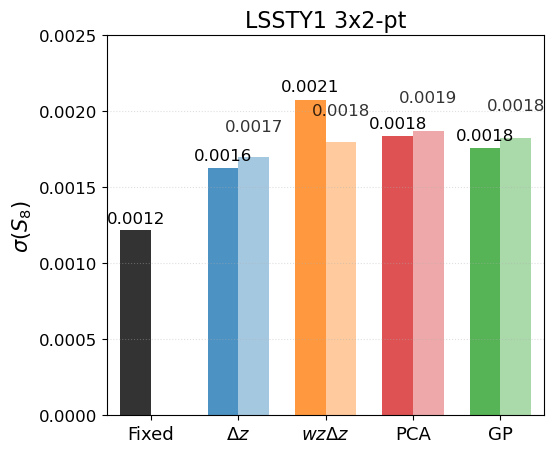

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
methods = ['Fixed', r'$\Delta z$', r'$wz\Delta z$', 'PCA', 'GP']
colors = ['k', 'C0', 'C1', 'C3', 'C2']

def compute_sigma(chain, param='σ8'):
    p = chain[param] * np.sqrt(chain["Ωm"] / 0.3)
    return np.std(p)

# Compute std deviations for each method (numerical + analytical)
p_fixed_s_num = compute_sigma(chain_Y1_3x2_nomarg)
p_fixed_s_ana = np.nan  # no analytical version for fixed model

p_dz_s_num    = compute_sigma(chain_Y1_3x2_dz_num)
p_dz_s_ana    = compute_sigma(chain_Y1_3x2_dz_ana)

p_wzdz_s_num  = compute_sigma(chain_Y1_3x2_wzdz_num)
p_wzdz_s_ana  = compute_sigma(chain_Y1_3x2_wzdz_ana)

p_pca_s_num   = compute_sigma(chain_Y1_3x2_PCA_num)
p_pca_s_ana   = compute_sigma(chain_Y1_3x2_PCA_ana)

p_gp_s_num    = compute_sigma(chain_Y1_3x2_gp_num)
p_gp_s_ana    = compute_sigma(chain_Y1_3x2_gp_ana)

sigmas_num = [p_fixed_s_num, p_dz_s_num, p_wzdz_s_num, p_pca_s_num, p_gp_s_num]
sigmas_ana = [np.nan,        p_dz_s_ana, p_wzdz_s_ana, p_pca_s_ana, p_gp_s_ana]

# --------------------------------------------
# Plot setup: two bars per method (num vs ana)
# --------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5))

xpos = np.arange(len(methods))
bar_width = 0.35

# Plot numerical (solid) and analytical (transparent)
bars_num = ax.bar(xpos - bar_width/2, sigmas_num, width=bar_width,
                  color=colors, alpha=0.8,)
bars_ana = ax.bar(xpos + bar_width/2, sigmas_ana, width=bar_width,
                  color=colors, alpha=0.4)

# Aesthetics
ax.set_xticks(xpos)
ax.set_xticklabels(methods, fontsize=13)
ax.set_ylabel(r'$\sigma(S_8)$', fontsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle=':', alpha=0.4)
ax.set_xlim(-0.5, len(methods)-0.5)
ax.set_ylim(0, 0.0025)    

# Annotate values above bars
for x, s in zip(xpos, sigmas_num):
    if not np.isnan(s):
        ax.text(x - bar_width/2, s * 1.02, f"{s:.4f}", ha='center', va='bottom', fontsize=12)
for x, s in zip(xpos, sigmas_ana):
    if not np.isnan(s):
        ax.text(x + bar_width/2, s * 1.09, f"{s:.4f}", ha='center', va='bottom', fontsize=12, alpha=0.8)

# Legend & title
ax.legend(fontsize=11, frameon=False)
plt.title("LSSTY1 3x2-pt", fontsize=16)
plt.tight_layout()
plt.savefig("./paper_plots/Y1_S8_comp.pdf", bbox_inches='tight', pad_inches=0)


In [60]:
print((0.00207-0.00163)/0.00163)
print((0.00181-0.00163)/0.00163)
print((0.00175-0.00163)/0.00163)

0.2699386503067484
0.11042944785276076
0.07361963190184055


## Shifts and Widths

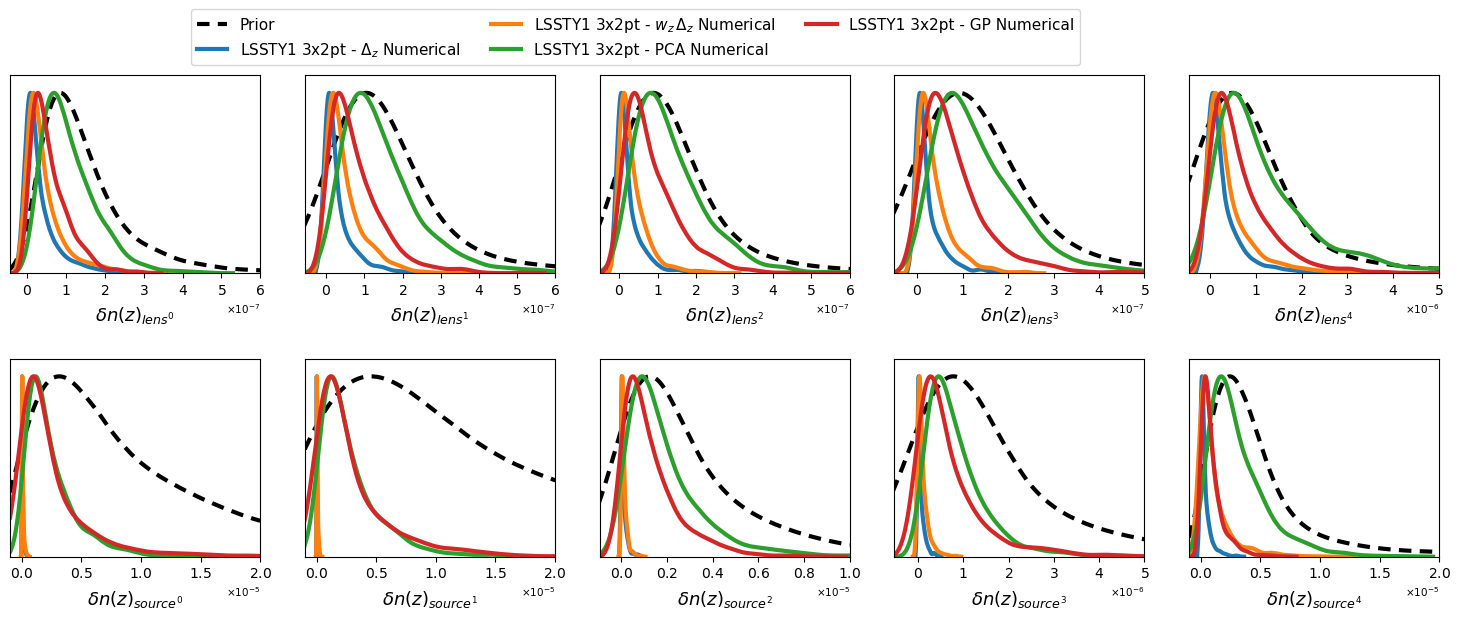

In [61]:
g = plots.get_subplot_plotter(width_inch=15)
samples_wzdz_prior.setRanges({'dnz_lens_0': (-0.00001, 0.0000006),
                             'dnz_lens_1': (-0.00001, 0.0000006),
                             'dnz_lens_2': (-0.00001, 0.0000006),
                             'dnz_lens_3': (-0.00001, 0.0000005),
                             'dnz_lens_4': (-0.00001, 0.000005),
                             'dnz_source_0': (-0.000001, 0.00002),
                             'dnz_source_1': (-0.000001, 0.00002),
                             'dnz_source_2': (-0.000001, 0.00001),
                             'dnz_source_3': (-0.000001, 0.000005),
                             'dnz_source_4': (-0.000001, 0.00002),
                            })
g.plots_1d([samples_wzdz_prior,
            samples_3x2_Y1_dz_num,
            samples_3x2_Y1_wzdz_num,
            samples_3x2_Y1_PCA_num,
            samples_3x2_Y1_gp_num,
            ], 
           ['dnz_lens_0', 'dnz_lens_1', 'dnz_lens_2', 'dnz_lens_3', 'dnz_lens_4',
            'dnz_source_0', 'dnz_source_1', 'dnz_source_2', 'dnz_source_3', 'dnz_source_4'],
            lws=3, ls=['--', '-', '-', '-', '-'], 
            colors=["black", 'C0', 'C1', 'C2', 'C3'],
            nx=5, legend_ncol=3);

g.export("./paper_plots/Y1_wzdz.pdf")

## Likelihood

In [62]:
cls_3x2_nomarg   = np.transpose(np.transpose(np.array(chain_Y1_3x2_nomarg))[14:622])
xi2_3x2_nomarg  = np.array(chain_Y1_3x2_nomarg['lp'])
data_3x2_nomarg  = np.load("sompz_fake_chains/nomarg/Y1_3x2_nomarg_TAP_0.65_init_ϵ_0.005/data_1.npz")

In [63]:
lkl_3x2_nomarg.shape

NameError: name 'lkl_3x2_nomarg' is not defined

In [ ]:
lkl_3x2_nomarg_m, lkl_3x2_nomarg_s   = np.mean(lkl_3x2_nomarg, axis=1), np.std(lkl_3x2_nomarg, axis=1)

In [ ]:
lkl_3x2_nomarg_cles  = [pacc.ClTheoryEnsemble(cle_3x2,  np.array(lkl_3x2_nomarg[i]))  for i in range(len(lkl_3x2_nomarg))]

In [ ]:
sel_3x2  = np.random.choice(len(lkl_3x2_nomarg), 50)

In [ ]:
cross_pairs =  [['source_0', 'lens_0'],
 ['source_0', 'lens_1'],
 ['source_0', 'lens_2'],
 ['source_0', 'lens_3'],
 ['source_0', 'lens_4'],
 ['source_1', 'lens_0'],
 ['source_1', 'lens_1'],
 ['source_1', 'lens_2'],
 ['source_1', 'lens_3'],
 ['source_1', 'lens_4'],
 ['source_2', 'lens_0'],
 ['source_2', 'lens_1'],
 ['source_2', 'lens_2'],
 ['source_2', 'lens_3'],
 ['source_2', 'lens_4'],
 ['source_3', 'lens_0'],
 ['source_3', 'lens_1'],
 ['source_3', 'lens_2'],
 ['source_3', 'lens_3'],
 ['source_3', 'lens_4'],
 ['source_4', 'lens_0'],
 ['source_4', 'lens_1'],
 ['source_4', 'lens_2'],
 ['source_4', 'lens_3'],
 ['source_4', 'lens_4']]

In [ ]:
g = pacc.plot_cls([[cle_3x2], lkl_3x2_nomarg_cles[sel_3x2]], cle_3x2.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_3x2_nomarg[sel_3x2],
                    "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/validation_3x2.pdf", bbox_inches='tight')